# Dollar, Crude, Corn, Gas, Coal, Monthly Imports to Predict Urea

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
data = pd.read_csv("C:/Users/msteinme/Documents/ureamorevariables.csv")
df_96on = data[['Date', 'Dollar', 'Crude', 'Corn','Gas','Coal','Monthly Imports','Urea']]
df_96on.tail()

,Date,Dollar,Crude,Corn,Gas,Coal,Monthly Imports,Urea
1051,2/26/2016,98.148,34.58,359.50,1.873,57.45,600000,265
1052,3/4/2016,97.340,37.75,358.25,1.787,58.00,1000000,270
1053,3/11/2016,96.172,40.09,365.00,1.915,58.50,1000000,274
1054,3/18/2016,95.086,41.14,371.75,1.989,59.20,1000000,265
1055,3/25/2016,96.273,40.63,374.50,1.882,58.75,1000000,255


In [2]:
from datetime import datetime
df_96on['Date'] = pd.to_datetime(df_96on['Date'])
date = df_96on['Date']
df_96on.dtypes

C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


Date               datetime64[ns]
Dollar                    float64
Crude                     float64
Corn                      float64
Gas                       float64
Coal                      float64
Monthly Imports             int64
Urea                        int64
dtype: object

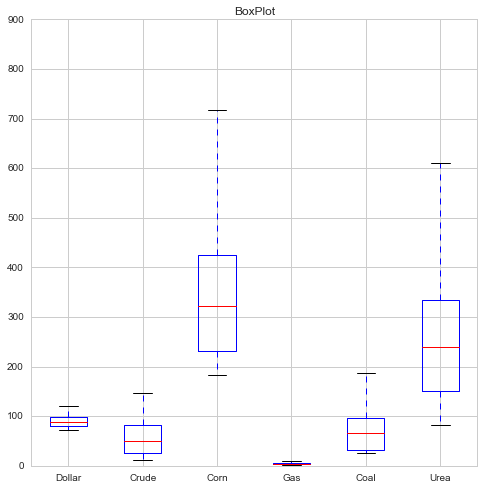

In [16]:
plt.show(df_96on[['Dollar','Crude','Corn','Gas','Coal','Urea']].plot(kind='box',figsize=(8,8),title=('BoxPlot'))) #no apparent outliers

In [3]:
df_96on.describe()

,Dollar,Crude,Corn,Gas,Coal,Monthly Imports,Urea
count,1056.000000,1056.000000,1056.000000,1056.000000,1056.000000,1056.000000,1056.000000
mean,90.653367,54.851648,361.660275,4.611925,70.446487,433007.549242,260.121212
std,11.734927,31.319022,157.085607,2.364021,40.849145,217395.350089,135.997458
min,71.657000,11.260000,182.500000,1.661000,26.410000,76875.000000,83.000000
25%,81.117750,26.402500,231.000000,2.770750,31.010000,273276.000000,150.750000
50%,87.835000,49.655000,322.750000,4.033500,67.025000,397255.000000,240.000000
75%,98.747500,82.082500,425.562500,5.879250,97.312500,561875.000000,335.000000
max,119.900000,145.860000,809.250000,14.431000,241.550000,1196863.000000,825.000000


In [4]:
df_96on.corr()

,Dollar,Crude,Corn,Gas,Coal,Monthly Imports,Urea
Dollar,1.000000,-0.774917,-0.682258,-0.329794,-0.772431,-0.273806,-0.728513
Crude,-0.774917,1.000000,0.777945,0.392775,0.899972,0.404582,0.870592
Corn,-0.682258,0.777945,1.000000,-0.000857,0.766544,0.336304,0.800001
Gas,-0.329794,0.392775,-0.000857,1.000000,0.430476,0.186481,0.325148
Coal,-0.772431,0.899972,0.766544,0.430476,1.000000,0.347264,0.880282
Monthly Imports,-0.273806,0.404582,0.336304,0.186481,0.347264,1.000000,0.421153
Urea,-0.728513,0.870592,0.800001,0.325148,0.880282,0.421153,1.000000


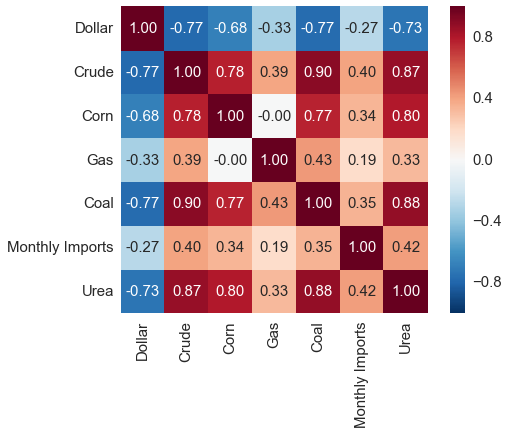

In [19]:
cols= ['Dollar','Crude','Corn','Gas','Coal','Monthly Imports','Urea']
cm = np.corrcoef(df_96on[cols].values.T)
sns.set(font_scale=1.5)
hm=sns.heatmap(cm,cbar=True,annot=True,square=True,fmt='.2f',annot_kws={'size':15},yticklabels=cols,xticklabels=cols)
plt.show()
#lot's of x variables correlating to each other
#crude, corn, dollar all correlated with each other
#monthly imports and gas correlated with nothing

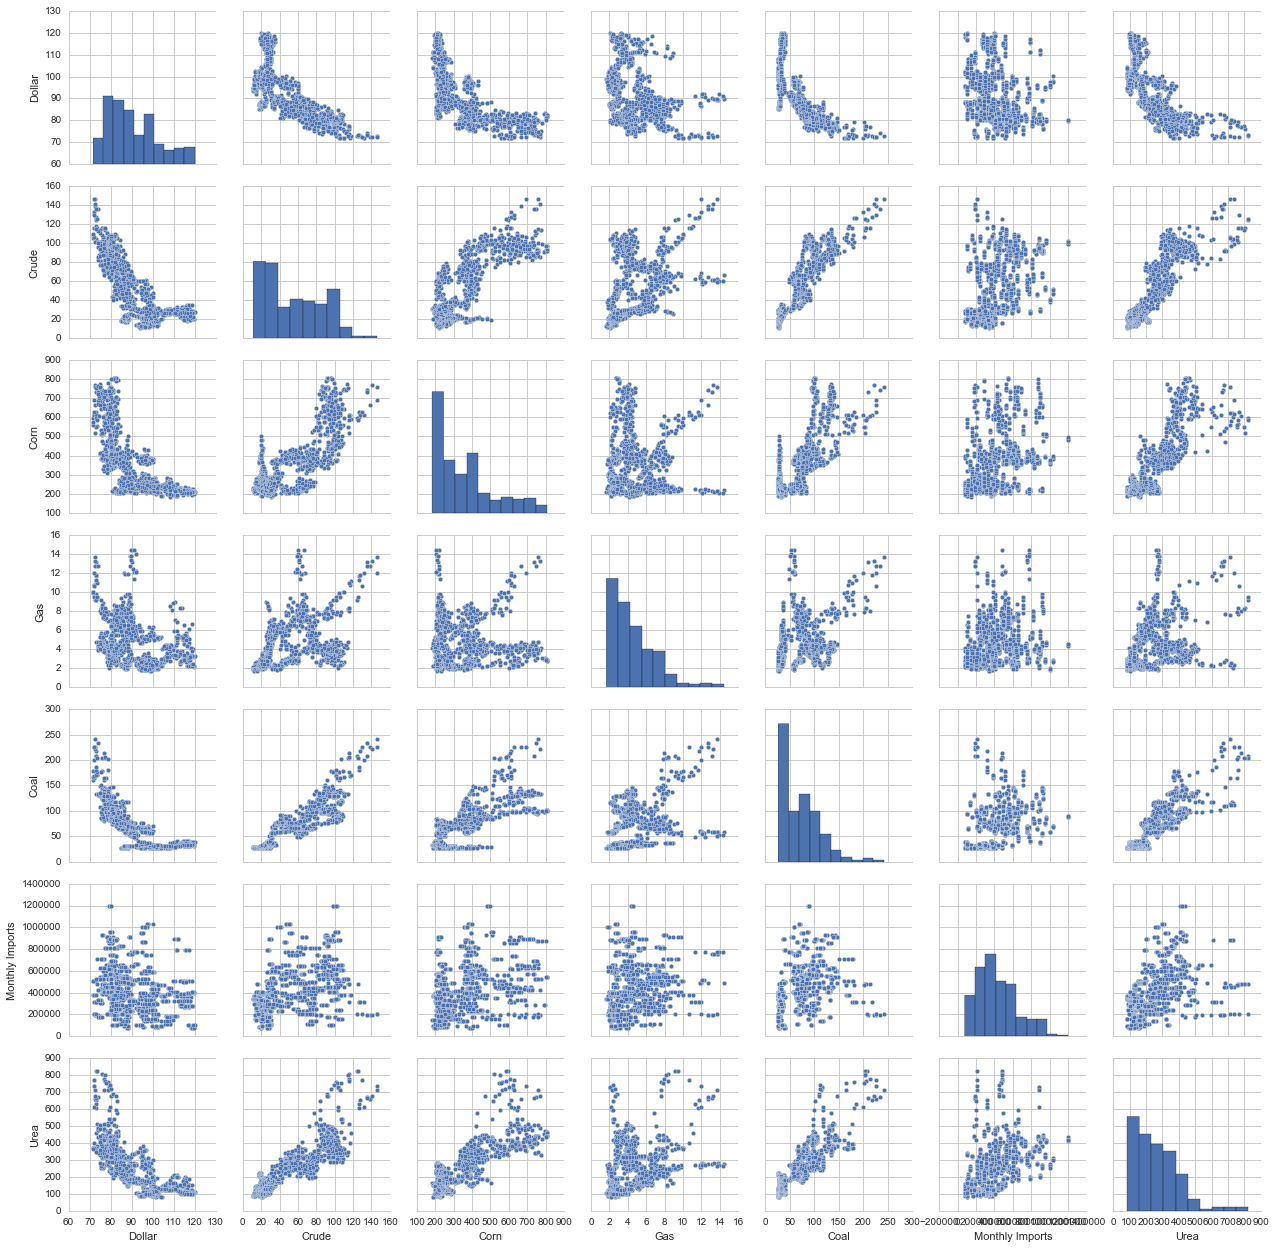

In [20]:
sns.set(style='whitegrid', context='notebook')
sns.pairplot(df_96on, size=2.5);
plt.show()
#pretty much all variables are positively skewed

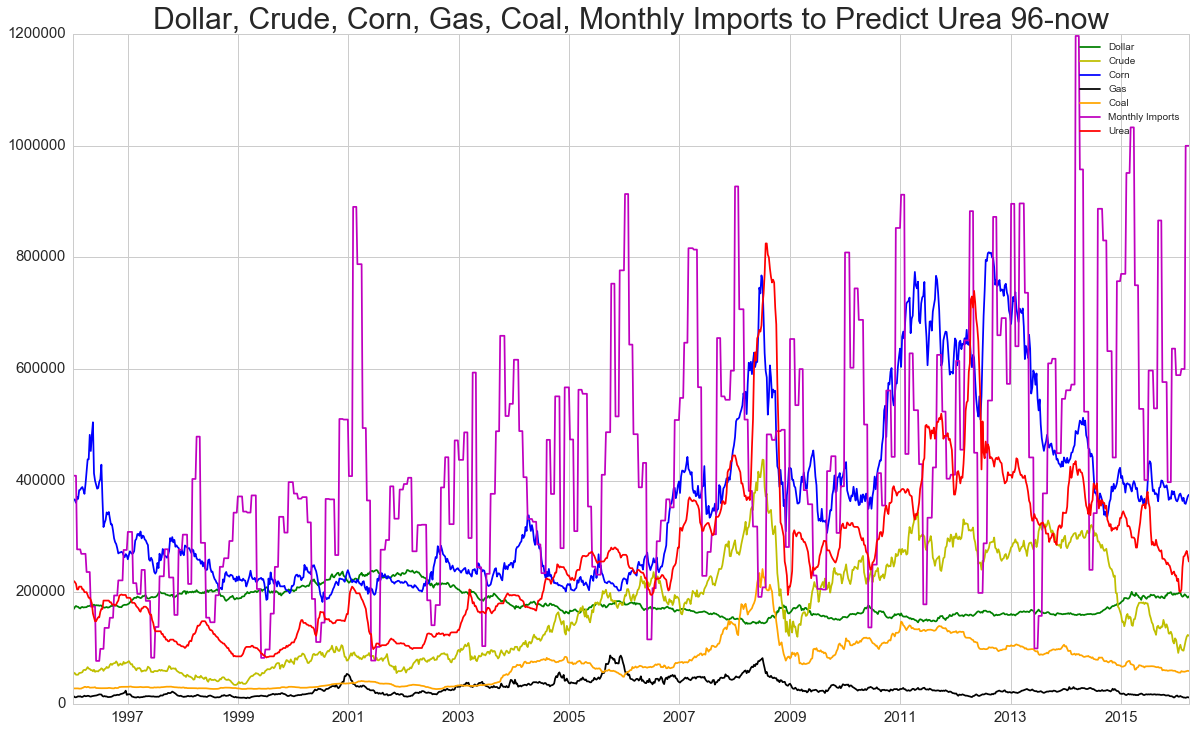

In [32]:
#trend, just modeify to look at the different variables and scaling
x = date
y1 = (df_96on['Dollar'])*2000
y2 = (df_96on['Crude'])*3000
y3 = (df_96on['Corn'])*1000
y4 = (df_96on['Gas'])*6000
y5 = (df_96on['Coal'])*1000
y6 = (df_96on['Monthly Imports'])
y7 = (df_96on['Urea'])*1000

fig = plt.figure(figsize=(20,12))
ax = fig.add_subplot(111)
ax.plot(x,y1,'g')
ax.plot(x,y2,'y')
ax.plot(x,y3,'b')
ax.plot(x,y4,'k')
ax.plot(x,y5,'orange')
ax.plot(x,y6,'m')
ax.plot(x,y7,'r')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
ax.set_title('Dollar, Crude, Corn, Gas, Coal, Monthly Imports to Predict Urea 96-now', size=(30))
ax.tick_params(axis='x',which='major',labelsize=15)
ax.tick_params(axis='y',which='major',labelsize=15)

plt.show()

### Look at different MLR's Since Different X variables are highly correlated to each other

In [3]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from statsmodels.sandbox.regression.predstd import wls_prediction_std
#fit a OLS model with all, see how R^2 changes
X = df_96on[['Dollar','Crude','Corn','Gas','Coal','Monthly Imports']]
Y = df_96on[['Urea']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Urea   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     886.5
Date:                Wed, 06 Apr 2016   Prob (F-statistic):               0.00
Time:                        14:47:45   Log-Likelihood:                -5733.4
No. Observations:                1056   AIC:                         1.148e+04
Df Residuals:                    1049   BIC:                         1.152e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
const               5.6811     27.594      0.206      0.837       -48.465    59.828
Dollar             -0.1441      0.243     -0.593      0.554        -0.621     0.333
Crude               1.0588      0.141      7.498      0.000         0.782     1.336
Corn                0.2279      0.023      9.975      0.000         0.183     0.273
Gas                 2.0429      1.014      2.015      0.044         0.054     4.032
Coal                1.3494      0.109     12.357      0.000         1.135     1.564
Monthly Imports  5.206e-05   8.65e-06      6.018      0.000      3.51e-05   6.9e-05
==============================================================================
Omnibus:                      455.713   Durbin-Watson:                   0.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3824.808
Skew:                           1.771   Prob(JB):                         0.00
Kurtosis:                      11.625   Cond. No.                     7.85e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.85e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [4]:
X = df_96on[['Dollar','Crude','Corn','Gas','Coal']]
Y = df_96on[['Urea']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Urea   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     1022.
Date:                Wed, 06 Apr 2016   Prob (F-statistic):               0.00
Time:                        14:48:05   Log-Likelihood:                -5751.4
No. Observations:                1056   AIC:                         1.151e+04
Df Residuals:                    1050   BIC:                         1.154e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          4.5544     28.053      0.162      0.871       -50.491    59.600
Dollar        -0.0315      0.247     -0.128      0.898        -0.515     0.452
Crude          1.2164      0.141      8.624      0.000         0.940     1.493
Corn           0.2424      0.023     10.497      0.000         0.197     0.288
Gas            2.6372      1.026      2.571      0.010         0.624     4.650
Coal           1.3041      0.111     11.775      0.000         1.087     1.521
==============================================================================
Omnibus:                      411.345   Durbin-Watson:                   0.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3042.669
Skew:                           1.603   Prob(JB):                         0.00
Kurtosis:                      10.673   Cond. No.                     6.71e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.71e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


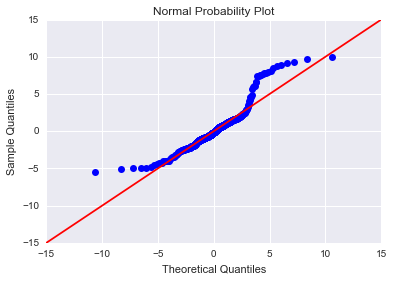

In [6]:
from scipy import stats
res = est.resid
fig = sm.graphics.qqplot(res, dist=stats.t, line='45', fit=True)
plt.title('Normal Probability Plot')
fig.show()
#not even close to normal, very skewed

In [7]:
#fit a OLS model with dollar, gas, monthly imports, see how R^2 changes
X = df_96on[['Dollar','Gas','Monthly Imports']]
Y = df_96on[['Urea']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Urea   R-squared:                       0.588
Model:                            OLS   Adj. R-squared:                  0.587
Method:                 Least Squares   F-statistic:                     500.9
Date:                Wed, 30 Mar 2016   Prob (F-statistic):          4.22e-202
Time:                        13:43:54   Log-Likelihood:                -6217.2
No. Observations:                1056   AIC:                         1.244e+04
Df Residuals:                    1052   BIC:                         1.246e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
const             852.7830     26.599     32.061      0.000       800.590   904.976
Dollar             -7.4373      0.250    -29.808      0.000        -7.927    -6.948
Gas                 4.0370      1.212      3.330      0.001         1.658     6.416
Monthly Imports     0.0001   1.29e-05     11.231      0.000         0.000     0.000
==============================================================================
Omnibus:                      453.862   Durbin-Watson:                   0.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2225.294
Skew:                           1.975   Prob(JB):                         0.00
Kurtosis:                       8.914   Cond. No.                     4.79e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.79e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


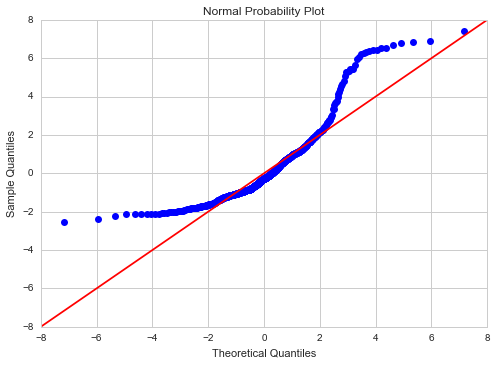

In [37]:
from scipy import stats
res = est.resid
fig = sm.graphics.qqplot(res, dist=stats.t, line='45', fit=True)
plt.title('Normal Probability Plot')
fig.show()

In [8]:
#fit a OLS model with crude, gas, monthly imports, see how R^2 changes
X = df_96on[['Crude','Gas','Monthly Imports']]
Y = df_96on[['Urea']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Urea   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     1135.
Date:                Wed, 30 Mar 2016   Prob (F-statistic):               0.00
Time:                        13:44:00   Log-Likelihood:                -5923.2
No. Observations:                1056   AIC:                         1.185e+04
Df Residuals:                    1052   BIC:                         1.187e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
const              42.1246      5.688      7.406      0.000        30.963    53.286
Crude               3.6728      0.076     48.319      0.000         3.524     3.822
Gas                -1.2986      0.937     -1.385      0.166        -3.138     0.541
Monthly Imports  5.202e-05   1.03e-05      5.075      0.000      3.19e-05  7.21e-05
==============================================================================
Omnibus:                      411.587   Durbin-Watson:                   0.063
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2326.232
Skew:                           1.702   Prob(JB):                         0.00
Kurtosis:                       9.425   Cond. No.                     1.36e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.36e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


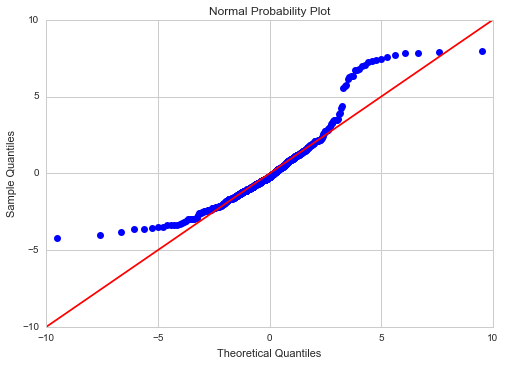

In [39]:
from scipy import stats
res = est.resid
fig = sm.graphics.qqplot(res, dist=stats.t, line='45', fit=True)
plt.title('Normal Probability Plot')
fig.show()

In [9]:
#fit a OLS model with corn, gas, monthly imports, see how R^2 changes
X = df_96on[['Corn','Gas','Monthly Imports']]
Y = df_96on[['Urea']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Urea   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     1086.
Date:                Wed, 30 Mar 2016   Prob (F-statistic):          1.49e-321
Time:                        13:44:05   Log-Likelihood:                -5941.0
No. Observations:                1056   AIC:                         1.189e+04
Df Residuals:                    1052   BIC:                         1.191e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
const             -89.3236      6.860    -13.021      0.000      -102.784   -75.863
Corn                0.6616      0.014     47.141      0.000         0.634     0.689
Gas                17.5938      0.894     19.680      0.000        15.840    19.348
Monthly Imports    6.7e-05   1.03e-05      6.491      0.000      4.67e-05  8.73e-05
==============================================================================
Omnibus:                      500.034   Durbin-Watson:                   0.092
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3992.969
Skew:                           2.010   Prob(JB):                         0.00
Kurtosis:                      11.636   Cond. No.                     1.61e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.61e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


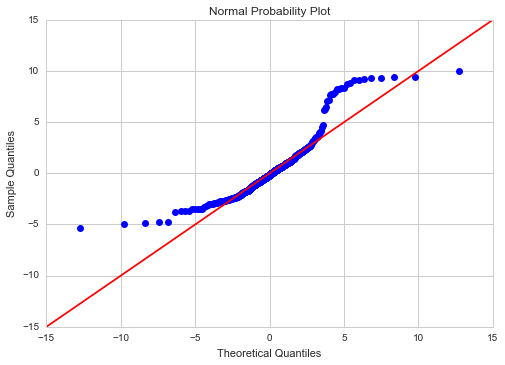

In [41]:
from scipy import stats
res = est.resid
fig = sm.graphics.qqplot(res, dist=stats.t, line='45', fit=True)
plt.title('Normal Probability Plot')
fig.show()

In [10]:
#fit a OLS model with coal, gas, monthly imports, see how R^2 changes
X = df_96on[['Coal','Gas','Monthly Imports']]
Y = df_96on[['Urea']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
est.summary()
#looking at dollar, crude, corn, coal, coal is the most important to keep

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Urea   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     1354.
Date:                Wed, 30 Mar 2016   Prob (F-statistic):               0.00
Time:                        13:44:10   Log-Likelihood:                -5850.7
No. Observations:                1056   AIC:                         1.171e+04
Df Residuals:                    1052   BIC:                         1.173e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
const              40.0720      5.313      7.542      0.000        29.646    50.498
Coal                2.8788      0.054     53.223      0.000         2.773     2.985
Gas                -4.1493      0.892     -4.651      0.000        -5.900    -2.399
Monthly Imports  8.403e-05   9.34e-06      9.000      0.000      6.57e-05     0.000
==============================================================================
Omnibus:                      269.640   Durbin-Watson:                   0.075
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1213.195
Skew:                           1.122   Prob(JB):                    3.61e-264
Kurtosis:                       7.747   Cond. No.                     1.36e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.36e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


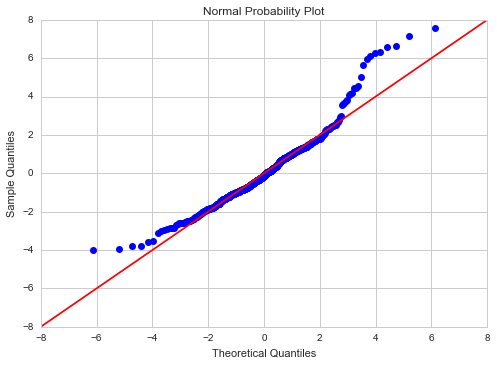

In [43]:
from scipy import stats
res = est.resid
fig = sm.graphics.qqplot(res, dist=stats.t, line='45', fit=True)
plt.title('Normal Probability Plot')
fig.show()
#slightly less skewed, but still obviously skewed

### Now use RDF model

In [11]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
X = df_96on[['Dollar','Crude','Corn','Gas','Coal','Monthly Imports']].values
y = df_96on['Urea'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)

In [45]:
from sklearn import metrics
from sklearn import grid_search
from sklearn.grid_search import GridSearchCV

def fit_predict_model(X_train,y_train,):
    """Find and tune the optimal model. Make a prediction on urea data"""
    
    # Setup a Random Forest Regressor
    regressor = RandomForestRegressor()

    parameters = {'n_estimators':(100,125,150,175,200),
                  'max_depth':(5,6,7,8,9,10)}

    mse_scorer = metrics.make_scorer(metrics.mean_squared_error, greater_is_better = False)
    
    # use grid search to fine tune the RandomForests Regressor and
    # obtain the parameters that generate the best training performance. 
    reg = grid_search.GridSearchCV(regressor, param_grid=parameters,
                                   scoring=mse_scorer, cv = 10)
    
    # Fit the learner to the training data to obtain the best parameter set
    print ("Final Model: ")
    print (reg.fit(X_train, y_train))
    return reg

In [48]:
#do multiple times to see what parameters are the best
rdf_model_ureaall = fit_predict_model(X_train,y_train)
print (rdf_model_ureaall.best_estimator_)

Final Model: 
GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': (5, 6, 7, 8, 9, 10), 'n_estimators': (100, 125, 150, 175, 200)},
       pre_dispatch='2*n_jobs', refit=True,
       scoring=make_scorer(mean_squared_error, greater_is_better=False),
       verbose=0)
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=125, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)


In [12]:
X = df_96on[['Dollar','Crude','Corn','Gas','Coal','Monthly Imports']].values
y = df_96on['Urea'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=125, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))
print(forest.feature_importances_) #crude and coal most important in this model

MSE train: 184.699, test: 1066.132
R^2 train: 0.991, test: 0.930
[ 0.01866107  0.66935375  0.07348402  0.05531008  0.16498792  0.01820316]


In [13]:
#comparing the different models
urea_predicted = forest.predict(X)
urea_predicted = pd.DataFrame(urea_predicted)
df_96on['Predicted_UreaAll_RDF'] = urea_predicted
rdf_error = (abs(df_96on['Predicted_UreaAll_RDF'] - df_96on['Urea'])/df_96on['Urea'])*100
df_96on['RDF_Error'] = rdf_error

mlr_predicted = 5.6811 - (df_96on['Dollar']*0.1441) + (df_96on['Crude']*1.0588) + (df_96on['Corn']*0.2279) + (df_96on['Gas']*2.0429) + (df_96on['Coal']*1.3494) + (df_96on['Monthly Imports']*0.00005206)
df_96on['Predicted_UreaAll_MLR'] = mlr_predicted
mlr_error = (abs(df_96on['Predicted_UreaAll_MLR'] - df_96on['Urea'])/df_96on['Urea'])*100
df_96on['MLR_All_Error'] = mlr_error

mlrdollar_predicted = 852.7830 - (df_96on['Dollar']*7.4373) + (df_96on['Gas']*4.0370) + (df_96on['Monthly Imports']*0.0001)
df_96on['Predicted_UreaDollar_MLR'] = mlrdollar_predicted
mlrdollar_error = (abs(df_96on['Predicted_UreaDollar_MLR'] - df_96on['Urea'])/df_96on['Urea'])*100
df_96on['MLR_Dollar_Error'] = mlrdollar_error

mlrcrude_predicted = 42.1246 + (df_96on['Crude']*3.6728) - (df_96on['Gas']*1.2986) + (df_96on['Monthly Imports']*0.00005202)
df_96on['Predicted_UreaCrude_MLR'] = mlrcrude_predicted
mlrcrude_error = (abs(df_96on['Predicted_UreaCrude_MLR'] - df_96on['Urea'])/df_96on['Urea'])*100
df_96on['MLR_Crude_Error'] = mlrcrude_error

mlrcorn_predicted = -89.3236 + (df_96on['Corn']*0.6616) + (df_96on['Gas']*17.5938) + (df_96on['Monthly Imports']*0.000067)
df_96on['Predicted_UreaCorn_MLR'] = mlrcorn_predicted
mlrcorn_error = (abs(df_96on['Predicted_UreaCorn_MLR'] - df_96on['Urea'])/df_96on['Urea'])*100
df_96on['MLR_Corn_Error'] = mlrcorn_error

mlrcoal_predicted = 40.0720 + (df_96on['Coal']*2.8788) - (df_96on['Gas']*4.1493) + (df_96on['Monthly Imports']*0.00008403)
df_96on['Predicted_UreaCoal_MLR'] = mlrcoal_predicted
mlrcoal_error = (abs(df_96on['Predicted_UreaCoal_MLR'] - df_96on['Urea'])/df_96on['Urea'])*100
df_96on['MLR_Coal_Error'] = mlrcoal_error

print("Average RDF error is: %.3f" % (rdf_error.mean()))  
print("Average MLR All error is: %.3f" % (mlr_error.mean()))
print("Average MLR Dollar error is: %.3f" % (mlrdollar_error.mean()))
print("Average MLR Crude error is: %.3f" % (mlrcrude_error.mean()))
print("Average MLR Corn error is: %.3f" % (mlrcorn_error.mean()))
print("Average MLR Coal error is: %.3f" % (mlrcoal_error.mean()))
df_96on

Average RDF error is: 3.900
Average MLR All error is: 14.497
Average MLR Dollar error is: 27.028
Average MLR Crude error is: 17.903
Average MLR Corn error is: 16.996
Average MLR Coal error is: 19.075


,Date,Dollar,Crude,Corn,Gas,Coal,Monthly Imports,Urea,Predicted_UreaAll_RDF,RDF_Error,Predicted_UreaAll_MLR,MLR_All_Error,Predicted_UreaDollar_MLR,MLR_Dollar_Error,Predicted_UreaCrude_MLR,MLR_Crude_Error,Predicted_UreaCorn_MLR,MLR_Corn_Error,Predicted_UreaCoal_MLR,MLR_Coal_Error
0,1996-01-05,85.060,19.65,369.75,2.424,27.15,408740,220,214.798857,2.364156,161.362603,26.653362,270.825950,23.102705,132.409968,39.813651,225.335951,2.425432,142.519939,35.218210
1,1996-01-12,85.060,17.98,366.25,2.215,27.55,408740,220,215.676000,1.965455,158.909551,27.768386,269.982217,22.719190,126.547800,42.478273,219.343247,0.298524,144.538663,34.300608
2,1996-01-19,86.750,18.25,365.00,1.956,27.55,408740,218,212.364000,2.585321,158.137912,27.459673,256.367597,17.599815,127.875793,41.341379,213.959453,1.853462,145.613331,33.204894
3,1996-01-26,87.640,17.36,360.25,1.952,27.55,408740,215,206.481238,3.962215,155.976634,27.452728,249.732252,16.154536,124.612196,42.040839,210.746478,1.978383,145.629929,32.265149
4,1996-02-02,87.010,17.38,370.50,2.075,27.60,276750,205,205.554667,0.270569,151.871915,25.916139,241.715302,17.909903,117.659804,42.604974,210.848585,2.852968,134.172385,34.550056
5,1996-02-09,86.870,17.38,367.25,2.244,27.60,276750,205,206.136000,0.554146,151.496665,26.099188,243.438777,18.750623,117.440341,42.712029,211.671737,3.254506,133.471153,34.892120
6,1996-02-16,85.910,18.40,382.75,2.171,27.15,276750,210,207.864000,1.017143,155.491065,25.956636,250.283884,19.182802,121.281394,42.246955,220.642190,5.067709,132.478592,36.914956
7,1996-02-23,85.430,18.45,383.50,2.263,27.25,276750,210,210.184000,0.087619,156.106985,25.663341,254.225192,21.059615,121.345563,42.216398,222.757019,6.074771,132.384737,36.959649
8,1996-03-01,86.490,18.62,386.75,2.058,27.35,268773,210,203.904000,2.902857,156.175773,25.630584,244.716369,16.531604,121.821189,41.989910,220.766031,5.126682,132.852916,36.736707
9,1996-03-08,86.810,18.87,388.50,2.053,28.50,268773,205,199.152000,2.852683,158.334781,22.763521,242.316248,18.203048,122.745882,40.123960,221.835862,8.212616,136.184282,33.568643


### now in predicting urea will get rid of monthly import for both mlr and RDF

In [14]:
#fit a OLS model with all but monthly imports see how R^2 changes
X = df_96on[['Dollar','Crude','Corn','Gas','Coal']]
Y = df_96on[['Urea']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
est.summary()
#R^2 didn't change much so clearly monthly imports doesn't seem to matter much

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Urea   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     1022.
Date:                Wed, 30 Mar 2016   Prob (F-statistic):               0.00
Time:                        13:45:01   Log-Likelihood:                -5751.4
No. Observations:                1056   AIC:                         1.151e+04
Df Residuals:                    1050   BIC:                         1.154e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          4.5544     28.053      0.162      0.871       -50.491    59.600
Dollar        -0.0315      0.247     -0.128      0.898        -0.515     0.452
Crude          1.2164      0.141      8.624      0.000         0.940     1.493
Corn           0.2424      0.023     10.497      0.000         0.197     0.288
Gas            2.6372      1.026      2.571      0.010         0.624     4.650
Coal           1.3041      0.111     11.775      0.000         1.087     1.521
==============================================================================
Omnibus:                      411.345   Durbin-Watson:                   0.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3042.669
Skew:                           1.603   Prob(JB):                         0.00
Kurtosis:                      10.673   Cond. No.                     6.71e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.71e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


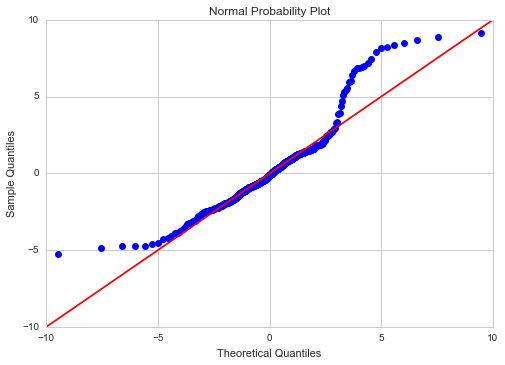

In [52]:
from scipy import stats
res = est.resid
fig = sm.graphics.qqplot(res, dist=stats.t, line='45', fit=True)
plt.title('Normal Probability Plot')
fig.show()
#huge skew

In [53]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
X = df_96on[['Dollar','Crude','Corn','Gas','Coal']].values
y = df_96on['Urea'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)

In [54]:
def fit_predict_model(X_train,y_train,):
    """Find and tune the optimal model. Make a prediction on urea data"""
    
    # Setup a Random Forest Regressor
    regressor = RandomForestRegressor()

    parameters = {'n_estimators':(100,125,150,175,200),
                  'max_depth':(5,6,7,8,9,10)}

    mse_scorer = metrics.make_scorer(metrics.mean_squared_error, greater_is_better = False)
    
    # use grid search to fine tune the RandomForests Regressor and
    # obtain the parameters that generate the best training performance. 
    reg = grid_search.GridSearchCV(regressor, param_grid=parameters,
                                   scoring=mse_scorer, cv = 10)
    
    # Fit the learner to the training data to obtain the best parameter set
    print ("Final Model: ")
    print (reg.fit(X_train, y_train))
    return reg

In [57]:
rdf_model_ureanoimport = fit_predict_model(X_train,y_train)
print (rdf_model_ureanoimport.best_estimator_)

Final Model: 
GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': (5, 6, 7, 8, 9, 10), 'n_estimators': (100, 125, 150, 175, 200)},
       pre_dispatch='2*n_jobs', refit=True,
       scoring=make_scorer(mean_squared_error, greater_is_better=False),
       verbose=0)
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)


In [15]:
X = df_96on[['Dollar','Crude','Corn','Gas','Coal']].values
y = df_96on['Urea'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))
print(forest.feature_importances_) #most important in model crude, and coal (dollar and gas least)

MSE train: 206.346, test: 1158.404
R^2 train: 0.990, test: 0.924
[ 0.02279488  0.68471655  0.09415952  0.06158423  0.13674483]


In [16]:
#comparing the different models
urea_predicted2 = forest.predict(X)
urea_predicted2 = pd.DataFrame(urea_predicted2)
df_96on['Predicted_UreaNoImport_RDF'] = urea_predicted2
rdf_error2 = (abs(df_96on['Predicted_UreaNoImport_RDF'] - df_96on['Urea'])/df_96on['Urea'])*100
df_96on['RDF_NoImport_Error'] = rdf_error2

mlrnoimport_predicted = 4.5544 - (df_96on['Dollar']*0.0315) + (df_96on['Crude']*1.2164) + (df_96on['Corn']*0.2424) + (df_96on['Gas']*2.6372) + (df_96on['Coal']*1.3041) 
df_96on['Predicted_UreaNoImport_MLR'] = mlrnoimport_predicted
mlrnoimport_error = (abs(df_96on['Predicted_UreaNoImport_MLR'] - df_96on['Urea'])/df_96on['Urea'])*100
df_96on['MLR_NoImport_Error'] = mlrnoimport_error

print("Average RDF No Import error is: %.3f" % (rdf_error2.mean()))  
print("Average MLR No Import error is: %.3f" % (mlrnoimport_error.mean()))

df_96on

Average RDF No Import error is: 4.306
Average MLR No Import error is: 15.285


,Date,Dollar,Crude,Corn,Gas,Coal,Monthly Imports,Urea,Predicted_UreaAll_RDF,RDF_Error,...,Predicted_UreaCrude_MLR,MLR_Crude_Error,Predicted_UreaCorn_MLR,MLR_Corn_Error,Predicted_UreaCoal_MLR,MLR_Coal_Error,Predicted_UreaNoImport_RDF,RDF_NoImport_Error,Predicted_UreaNoImport_MLR,MLR_NoImport_Error
0,1996-01-05,85.060,19.65,369.75,2.424,27.15,408740,220,214.798857,2.364156,...,132.409968,39.813651,225.335951,2.425432,142.519939,35.218210,210.530000,4.304545,157.203558,28.543837
1,1996-01-12,85.060,17.98,366.25,2.215,27.55,408740,220,215.676000,1.965455,...,126.547800,42.478273,219.343247,0.298524,144.538663,34.300608,211.100000,4.045455,154.294235,29.866257
2,1996-01-19,86.750,18.25,365.00,1.956,27.55,408740,218,212.364000,2.585321,...,127.875793,41.341379,213.959453,1.853462,145.613331,33.204894,204.600000,6.146789,153.583393,29.548902
3,1996-01-26,87.640,17.36,360.25,1.952,27.55,408740,215,206.481238,3.962215,...,124.612196,42.040839,210.746478,1.978383,145.629929,32.265149,190.090000,11.586047,151.310813,29.622877
4,1996-02-02,87.010,17.38,370.50,2.075,27.60,276750,205,205.554667,0.270569,...,117.659804,42.604974,210.848585,2.852968,134.172385,34.550056,201.053333,1.925203,154.229167,24.766260
5,1996-02-09,86.870,17.38,367.25,2.244,27.60,276750,205,206.136000,0.554146,...,117.440341,42.712029,211.671737,3.254506,133.471153,34.892120,200.380000,2.253659,153.891464,24.930993
6,1996-02-16,85.910,18.40,382.75,2.171,27.15,276750,210,207.864000,1.017143,...,121.281394,42.246955,220.642190,5.067709,132.478592,36.914956,205.733333,2.031746,158.140271,24.695109
7,1996-02-23,85.430,18.45,383.50,2.263,27.25,276750,210,210.184000,0.087619,...,121.345563,42.216398,222.757019,6.074771,132.384737,36.959649,207.860000,1.019048,158.771044,24.394741
8,1996-03-01,86.490,18.62,386.75,2.058,27.35,268773,210,203.904000,2.902857,...,121.821189,41.989910,220.766031,5.126682,132.852916,36.736707,199.303333,5.093651,159.322026,24.132369
9,1996-03-08,86.810,18.87,388.50,2.053,28.50,268773,205,199.152000,2.852683,...,122.745882,40.123960,221.835862,8.212616,136.184282,33.568643,193.176667,5.767480,161.526775,21.206451


### In both of the RDF models crude, coal, and corn are the most import variables so will make MLR and RDF model with only those variables

In [17]:
#fit a OLS model with crude, corn, coal to see how R^2 changes
X = df_96on[['Crude','Corn','Coal']]
Y = df_96on[['Urea']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
est.summary() #R^2 barely changed at all

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Urea   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     1694.
Date:                Wed, 30 Mar 2016   Prob (F-statistic):               0.00
Time:                        13:45:37   Log-Likelihood:                -5754.7
No. Observations:                1056   AIC:                         1.152e+04
Df Residuals:                    1052   BIC:                         1.154e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         13.5920      4.360      3.117      0.002         5.037    22.148
Crude          1.3090      0.134      9.769      0.000         1.046     1.572
Corn           0.2071      0.018     11.423      0.000         0.172     0.243
Coal           1.4169      0.101     14.097      0.000         1.220     1.614
==============================================================================
Omnibus:                      378.935   Durbin-Watson:                   0.071
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2500.860
Skew:                           1.491   Prob(JB):                         0.00
Kurtosis:                       9.924   Cond. No.                     1.02e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.02e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


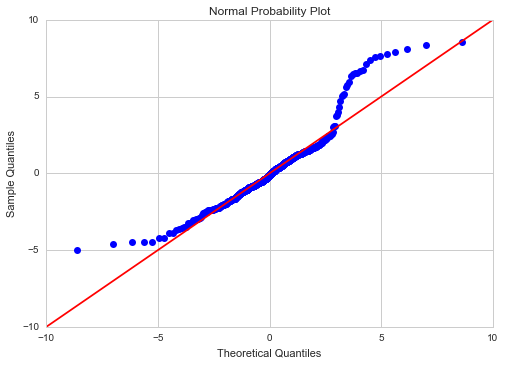

In [61]:
from scipy import stats
res = est.resid
fig = sm.graphics.qqplot(res, dist=stats.t, line='45', fit=True)
plt.title('Normal Probability Plot')
fig.show()
#huge skew

In [62]:
X = df_96on[['Crude','Corn','Coal']].values
y = df_96on['Urea'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)

In [63]:
def fit_predict_model(X_train,y_train,):
    """Find and tune the optimal model. Make a prediction on urea data"""
    
    # Setup a Random Forest Regressor
    regressor = RandomForestRegressor()

    parameters = {'n_estimators':(100,125,150,175,200),
                  'max_depth':(5,6,7,8,9,10)}

    mse_scorer = metrics.make_scorer(metrics.mean_squared_error, greater_is_better = False)
    
    # use grid search to fine tune the RandomForests Regressor and
    # obtain the parameters that generate the best training performance. 
    reg = grid_search.GridSearchCV(regressor, param_grid=parameters,
                                   scoring=mse_scorer, cv = 10)
    
    # Fit the learner to the training data to obtain the best parameter set
    print ("Final Model: ")
    print (reg.fit(X_train, y_train))
    return reg

In [67]:
rdf_model_ureatop3 = fit_predict_model(X_train,y_train)
print (rdf_model_ureatop3.best_estimator_)

Final Model: 
GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': (5, 6, 7, 8, 9, 10), 'n_estimators': (100, 125, 150, 175, 200)},
       pre_dispatch='2*n_jobs', refit=True,
       scoring=make_scorer(mean_squared_error, greater_is_better=False),
       verbose=0)
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=200, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)


In [20]:
X = df_96on[['Crude','Corn','Coal']].values
y = df_96on['Urea'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=200, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))
print(forest.feature_importances_) #crude most important, other two about same level of importnace in this model

MSE train: 336.628, test: 1596.617
R^2 train: 0.983, test: 0.896
[ 0.70914824  0.11263987  0.17821189]


In [21]:
#comparing the different models
urea_predicted3 = forest.predict(X)
urea_predicted3 = pd.DataFrame(urea_predicted3)
df_96on['Predicted_UreaTop3_RDF'] = urea_predicted3
rdf_error3 = (abs(df_96on['Predicted_UreaTop3_RDF'] - df_96on['Urea'])/df_96on['Urea'])*100
df_96on['RDF_Top3_Error'] = rdf_error3

mlrtop3_predicted = 13.5920 + (df_96on['Crude']*1.3090) + (df_96on['Corn']*0.2071) + (df_96on['Coal']*1.4169) 
df_96on['Predicted_UreaTop3_MLR'] = mlrtop3_predicted
mlrtop3_error = (abs(df_96on['Predicted_UreaTop3_MLR'] - df_96on['Urea'])/df_96on['Urea'])*100
df_96on['MLR_Top3_Error'] = mlrtop3_error

print("Average RDF Top 3 error is: %.3f" % (rdf_error3.mean()))  
print("Average MLR Top3 error is: %.3f" % (mlrtop3_error.mean()))

df_96on

Average RDF Top 3 error is: 5.186
Average MLR Top3 error is: 15.824


,Date,Dollar,Crude,Corn,Gas,Coal,Monthly Imports,Urea,Predicted_UreaAll_RDF,RDF_Error,...,Predicted_UreaCoal_MLR,MLR_Coal_Error,Predicted_UreaNoImport_RDF,RDF_NoImport_Error,Predicted_UreaNoImport_MLR,MLR_NoImport_Error,Predicted_UreaTop3_RDF,RDF_Top3_Error,Predicted_UreaTop3_MLR,MLR_Top3_Error
0,1996-01-05,85.060,19.65,369.75,2.424,27.15,408740,220,214.798857,2.364156,...,142.519939,35.218210,210.530000,4.304545,157.203558,28.543837,204.528874,7.032330,154.357910,29.837314
1,1996-01-12,85.060,17.98,366.25,2.215,27.55,408740,220,215.676000,1.965455,...,144.538663,34.300608,211.100000,4.045455,154.294235,29.866257,209.555000,4.747727,152.013790,30.902823
2,1996-01-19,86.750,18.25,365.00,1.956,27.55,408740,218,212.364000,2.585321,...,145.613331,33.204894,204.600000,6.146789,153.583393,29.548902,209.955000,3.690367,152.108345,30.225530
3,1996-01-26,87.640,17.36,360.25,1.952,27.55,408740,215,206.481238,3.962215,...,145.629929,32.265149,190.090000,11.586047,151.310813,29.622877,211.130000,1.800000,149.959610,30.251344
4,1996-02-02,87.010,17.38,370.50,2.075,27.60,276750,205,205.554667,0.270569,...,134.172385,34.550056,201.053333,1.925203,154.229167,24.766260,203.035332,0.958375,152.179410,25.766141
5,1996-02-09,86.870,17.38,367.25,2.244,27.60,276750,205,206.136000,0.554146,...,133.471153,34.892120,200.380000,2.253659,153.891464,24.930993,204.845000,0.075610,151.506335,26.094471
6,1996-02-16,85.910,18.40,382.75,2.171,27.15,276750,210,207.864000,1.017143,...,132.478592,36.914956,205.733333,2.031746,158.140271,24.695109,208.302190,0.808481,155.413960,25.993352
7,1996-02-23,85.430,18.45,383.50,2.263,27.25,276750,210,210.184000,0.087619,...,132.384737,36.959649,207.860000,1.019048,158.771044,24.394741,208.087190,0.910862,155.776425,25.820750
8,1996-03-01,86.490,18.62,386.75,2.058,27.35,268773,210,203.904000,2.902857,...,132.852916,36.736707,199.303333,5.093651,159.322026,24.132369,203.753214,2.974660,156.813720,25.326800
9,1996-03-08,86.810,18.87,388.50,2.053,28.50,268773,205,199.152000,2.852683,...,136.184282,33.568643,193.176667,5.767480,161.526775,21.206451,190.139578,7.248986,159.132830,22.374229


In [ ]:
#combined.to_csv("C:/Users/msteinme/Documents/ureaall.csv")
#then put new predictions, "need other values besides just crude, dollar, corn to 2020

In [25]:
#monthly predictions remember 2 months in future so jan96->mar96
mar_96 = df_96on[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][0:4]
apr_96 = df_96on[['Date','Dollar','Crude','Corn','Gas','Coal','Urea'][4:8]
may_96 = df_96on[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][8:13]
jun_96 = df_96on[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][13:17]
jul_96 = df_96on[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][17:22]
aug_96 = df_96on[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][22:26]
sep_96 = df_96on[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][26:30]
oct_96 = df_96on[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][30:35]
nov_96 = df_96on[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][35:39]
dec_96 = df_96on[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][39:43]
jan_97 = df_96on[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][43:48]
feb_97 = df_96on[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][48:52]
mar_97 = df_96on[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][52:57]
apr_97 = df_96on[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][57:61]
may_97 = df_96on[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][61:65]
jun_97 = df_96on[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][65:69]
jul_97 = df_96on[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][69:74]
aug_97 = df_96on[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][74:78]
sep_97 = df_96on[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][78:82]
oct_97 = df_96on[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][82:87]
nov_97 = df_96on[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][87:91]
dec_97 = df_96on[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][91:96]
jan_98 = df_96on[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][96:100]
feb_98 = df_96on[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][100:104]
mar_98 = df_96on[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][104:109]
apr_98 = df_96on[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][109:113]
may_98 = df_96on[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][113:117]
jun_98 = df_96on[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][117:121]
jul_98 = df_96on[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][121:126]
aug_98 = df_96on[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][126:130]
sep_98 = df_96on[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][130:135]
oct_98 = df_96on[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][135:139]
nov_98 = df_96on[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][139:143]
dec_98 = df_96on[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][143:148]
jan_99 = df_96on[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][148:152]
feb_99 = df_96on[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][152:156]
mar_99 = df_96on[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][156:161]
apr_99 = df_96on[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][161:165]
may_99 = df_96on[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][165:169]
jun_99 = df_96on[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][169:174]
jul_99 = df_96on[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][174:178]
aug_99 = df_96on[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][178:182]
sep_99 = df_96on[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][182:187]
oct_99 = df_96on[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][187:191]
nov_99 = df_96on[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][191:195]
dec_99 = df_96on[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][195:200]
jan_00 = df_96on[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][200:204]
feb_00 = df_96on[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][204:209]
mar_00 = df_96on[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][209:213]
apr_00 = df_96on[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][213:217]
may_00 = df_96on[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][217:222]
jun_00 = df_96on[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][222:226]
jul_00 = df_96on[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][226:230]
aug_00 = df_96on[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][230:235]
sep_00 = df_96on[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][235:239]
oct_00 = df_96on[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][239:243]
nov_00 = df_96on[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][243:248]
dec_00 = df_96on[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][248:252]
jan_01 = df_96on[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][252:256]
feb_01 = df_96on[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][256:261]
mar_01 = df_96on[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][261:265]
apr_01 = df_96on[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][265:269]
may_01 = df_96on[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][269:274]
jun_01 = df_96on[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][274:278]
jul_01 = df_96on[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][278:282]
aug_01 = df_96on[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][282:287]
sep_01 = df_96on[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][287:291]
oct_01 = df_96on[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][291:296]
nov_01 = df_96on[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][296:300]
dec_01 = df_96on[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][300:304]
jan_02 = df_96on[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][304:309]
feb_02 = df_96on[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][309:313]
mar_02 = df_96on[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][313:317]
apr_02 = df_96on[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][317:321]
may_02 = df_96on[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][321:326]
jun_02 = df_96on[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][326:330]
jul_02 = df_96on[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][330:335]
aug_02 = df_96on[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][335:339]
sep_02 = df_96on[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][339:343]
oct_02 = df_96on[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][343:348]
nov_02 = df_96on[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][348:352]
dec_02 = df_96on[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][352:356]
jan_03 = df_96on[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][356:361]
feb_03 = df_96on[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][361:365]
mar_03 = df_96on[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][365:370]
apr_03 = df_96on[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][370:374]
may_03 = df_96on[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][374:378]
jun_03 = df_96on[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][378:382]
jul_03 = df_96on[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][382:387]
aug_03 = df_96on[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][387:391]
sep_03 = df_96on[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][391:395]
oct_03 = df_96on[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][395:400]
nov_03 = df_96on[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][400:404]
dec_03 = df_96on[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][404:409]
jan_04 = df_96on[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][409:413]
feb_04 = df_96on[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][413:417]
mar_04 = df_96on[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][417:422]
apr_04 = df_96on[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][422:426]
may_04 = df_96on[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][426:430]
jun_04 = df_96on[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][430:435]
jul_04 = df_96on[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][435:439]
aug_04 = df_96on[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][439:443]
sep_04 = df_96on[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][443:448]
oct_04 = df_96on[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][448:452]
nov_04 = df_96on[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][452:456]
dec_04 = df_96on[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][456:461]
jan_05 = df_96on[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][461:465]
feb_05 = df_96on[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][465:470]
mar_05 = df_96on[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][470:474]
apr_05 = df_96on[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][474:478]
may_05 = df_96on[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][478:482]
jun_05 = df_96on[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][482:487]
jul_05 = df_96on[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][487:491]
aug_05 = df_96on[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][491:495]
sep_05 = df_96on[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][495:500]
oct_05 = df_96on[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][500:504]
nov_05 = df_96on[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][504:509]
dec_05 = df_96on[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][509:513]
jan_06 = df_96on[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][513:517]
feb_06 = df_96on[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][517:522]
mar_06 = df_96on[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][522:526]
apr_06 = df_96on[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][526:530]
may_06 = df_96on[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][530:535]
jun_06 = df_96on[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][535:539]
jul_06 = df_96on[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][539:543]
aug_06 = df_96on[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][543:548]
sep_06 = df_96on[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][548:552]
oct_06 = df_96on[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][552:556]
nov_06 = df_96on[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][556:561]
dec_06 = df_96on[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][561:565]
jan_07 = df_96on[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][565:569]
feb_07 = df_96on[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][569:574]
mar_07 = df_96on[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][574:578]
apr_07 = df_96on[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][578:582]
may_07 = df_96on[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][582:587]
jun_07 = df_96on[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][587:591]
jul_07 = df_96on[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][591:595]
aug_07 = df_96on[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][595:600]
sep_07 = df_96on[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][600:604]
oct_07 = df_96on[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][604:609]
nov_07 = df_96on[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][609:613]
dec_07 = df_96on[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][613:617]
jan_08 = df_96on[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][617:622]
feb_08 = df_96on[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][622:626]
mar_08 = df_96on[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][626:630]
apr_08 = df_96on[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][630:635]
may_08 = df_96on[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][635:639]
jun_08 = df_96on[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][639:643]
jul_08 = df_96on[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][643:648]
aug_08 = df_96on[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][648:652]
sep_08 = df_96on[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][652:656]
oct_08 = df_96on[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][656:661]
nov_08 = df_96on[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][661:665]
dec_08 = df_96on[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][665:670]
jan_09 = df_96on[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][670:674]
feb_09 = df_96on[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][674:678]
mar_09 = df_96on[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][678:683]
apr_09 = df_96on[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][683:687]
may_09 = df_96on[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][687:691]
jun_09 = df_96on[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][691:695]
jul_09 = df_96on[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][695:700]
aug_09 = df_96on[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][700:704]
sep_09 = df_96on[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][704:709]
oct_09 = df_96on[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][709:713]
nov_09 = df_96on[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][713:717]
dec_09 = df_96on[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][717:722]
jan_10 = df_96on[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][722:726]
feb_10 = df_96on[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][726:730]
mar_10 = df_96on[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][730:735]
apr_10 = df_96on[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][735:739]
may_10 = df_96on[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][739:743]
jun_10 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][743:748]
jul_10 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][748:752]
aug_10 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][752:756]
sep_10 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][756:761]
oct_10 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][761:765]
nov_10 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][765:769]
dec_10 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][769:774]
jan_11 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][774:778]
feb_11 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][778:783]
mar_11 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][783:787]
apr_11 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][787:791]
may_11 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][791:795]
jun_11 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][795:800]
jul_11 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][800:804]
aug_11 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][804:808]
sep_11 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][808:813]
oct_11 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][813:817]
nov_11 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][817:822]
dec_11 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][822:826]
jan_12 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][826:830]
feb_12 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][830:835]
mar_12 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][835:839]
apr_12 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][839:843]
may_12 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][843:848]
jun_12 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][848:852]
jul_12 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][852:856]
aug_12 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][856:861]
sep_12 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][861:865]
oct_12 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][865:870]
nov_12 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][870:874]
dec_12 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][874:878]
jan_13 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][878:883]
feb_13 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][883:887]
mar_13 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][887:891]
apr_13 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][891:895]
may_13 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][895:900]
jun_13 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][900:904]
jul_13 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][904:909]
aug_13 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][909:913]
sep_13 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][913:917]
oct_13 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][917:922]
nov_13 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][922:926]
dec_13 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][926:930]
jan_14 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][930:935]
feb_14 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][935:939]
mar_14 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][939:944]
apr_14 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][944:948]
may_14 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][948:952]
jun_14 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][952:956]
jul_14 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][956:961]
aug_14 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][961:965]
sep_14 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][965:969]
oct_14 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][969:974]
nov_14 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][974:978]
dec_14 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][978:983]
jan_15 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][983:987]
feb_15 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][987:991]
mar_15 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][991:996]
apr_15 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][996:1000]
may_15 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][1000:1004]
jun_15 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][1004:1008]
jul_15 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][1008:1013]
aug_15 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][1013:1017]
sep_15 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][1017:1022]
oct_15 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][1022:1026]
nov_15 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][1026:1030]
dec_15 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][1030:1035]
jan_16 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][1035:1039]
feb_16 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][1039:1043]
mar_16 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][1043:1048]
apr_16 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][1048:1052]
may_16 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea']][1052:1056]
may_16

,Date,Dollar,Crude,Corn,Gas,Coal,Urea,Monthly Imports,Predicted_Import
1052,2016-03-04,97.340,37.75,358.25,1.787,58.00,270,1000000,876241.137111
1053,2016-03-11,96.172,40.09,365.00,1.915,58.50,274,1000000,945856.031141
1054,2016-03-18,95.086,41.14,371.75,1.989,59.20,265,1000000,929807.067486
1055,2016-03-25,96.273,40.63,374.50,1.882,58.75,255,1000000,874679.027221


In [70]:
"""x = (combined['Date'])
y1 = (combined['Coal'])
y2 = (combined['Predicted_CoalAll_RDF'])
y3 = (combined['Predicted_Coal_LR'])
y4 = (combined['Predicted_Coal_MLR'])

fig = plt.figure(figsize=(20,12))
ax = fig.add_subplot(111)
ax.plot(x,y1,'g')
ax.plot(x,y2,'r')
ax.plot(x,y3,'b')
ax.plot(x,y4,'y')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
ax.set_title('BDI and Freight(except LR used only Freight) to Predict Coal', size=(30))
ax.tick_params(axis='x',which='major',labelsize=15)
ax.tick_params(axis='y',which='major',labelsize=15)

plt.show()"""

"x = (combined['Date'])\ny1 = (combined['Coal'])\ny2 = (combined['Predicted_CoalAll_RDF'])\ny3 = (combined['Predicted_Coal_LR'])\ny4 = (combined['Predicted_Coal_MLR'])\n\nfig = plt.figure(figsize=(20,12))\nax = fig.add_subplot(111)\nax.plot(x,y1,'g')\nax.plot(x,y2,'r')\nax.plot(x,y3,'b')\nax.plot(x,y4,'y')\n\nhandles, labels = ax.get_legend_handles_labels()\nax.legend(handles, labels)\nax.set_title('BDI and Freight(except LR used only Freight) to Predict Coal', size=(30))\nax.tick_params(axis='x',which='major',labelsize=15)\nax.tick_params(axis='y',which='major',labelsize=15)\n\nplt.show()"

# Now Predict Monthly Import

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
data = pd.read_csv("C:/Users/msteinme/Documents/ureamorevariables.csv")
df_month = data[['Date', 'Dollar', 'Crude', 'Corn','Gas','Coal','Urea','Monthly Imports']]
df_month.tail()

,Date,Dollar,Crude,Corn,Gas,Coal,Urea,Monthly Imports
1051,2/26/2016,98.148,34.58,359.50,1.873,57.45,265,600000
1052,3/4/2016,97.340,37.75,358.25,1.787,58.00,270,1000000
1053,3/11/2016,96.172,40.09,365.00,1.915,58.50,274,1000000
1054,3/18/2016,95.086,41.14,371.75,1.989,59.20,265,1000000
1055,3/25/2016,96.273,40.63,374.50,1.882,58.75,255,1000000


In [6]:
from datetime import datetime
df_month['Date'] = pd.to_datetime(df_month['Date'])
date = df_month['Date']
df_month.dtypes

C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


Date               datetime64[ns]
Dollar                    float64
Crude                     float64
Corn                      float64
Gas                       float64
Coal                      float64
Urea                        int64
Monthly Imports             int64
dtype: object

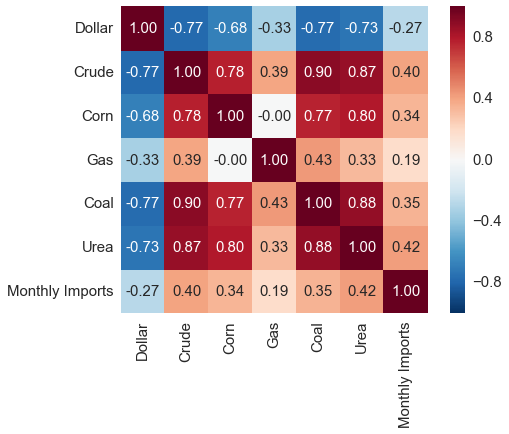

In [74]:
cols= ['Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports']
cm = np.corrcoef(df_month[cols].values.T)
sns.set(font_scale=1.5)
hm=sns.heatmap(cm,cbar=True,annot=True,square=True,fmt='.2f',annot_kws={'size':15},yticklabels=cols,xticklabels=cols)
plt.show()
#nothing is correlated to monthly urea, maybe check if leading look at trend below monthly split

### RDF model using all variables to predict Monthly Imports

In [7]:
X = df_month[['Dollar','Crude','Corn','Gas','Coal','Urea']].values
y = df_month['Monthly Imports'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)

In [73]:
from sklearn import metrics
from sklearn import grid_search
from sklearn.grid_search import GridSearchCV

def fit_predict_model(X_train,y_train,):
    """Find and tune the optimal model. Make a prediction on urea data"""
    
    # Setup a Random Forest Regressor
    regressor = RandomForestRegressor()

    parameters = {'n_estimators':(100,125,150,175,200),
                  'max_depth':(5,6,7,8,9,10)}

    mse_scorer = metrics.make_scorer(metrics.mean_squared_error, greater_is_better = False)
    
    # use grid search to fine tune the RandomForests Regressor and
    # obtain the parameters that generate the best training performance. 
    reg = grid_search.GridSearchCV(regressor, param_grid=parameters,
                                   scoring=mse_scorer, cv = 10)
    
    # Fit the learner to the training data to obtain the best parameter set
    print ("Final Model: ")
    print (reg.fit(X_train, y_train))
    return reg

In [76]:
rdf_model_importall = fit_predict_model(X_train,y_train)
print (rdf_model_importall.best_estimator_)

Final Model: 
GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': (100, 125, 150, 175, 200), 'max_depth': (5, 6, 7, 8, 9, 10)},
       pre_dispatch='2*n_jobs', refit=True,
       scoring=make_scorer(mean_squared_error, greater_is_better=False),
       verbose=0)
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=150, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)


In [8]:
X = df_month[['Dollar','Crude','Corn','Gas','Coal','Urea']].values
y = df_month['Monthly Imports'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,min_samples_split=2, min_weight_fraction_leaf=0.0,n_estimators=175, n_jobs=1, oob_score=False, random_state=None,verbose=0, warm_start=False)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))
print(forest.feature_importances_) #huge mse so will want to do something else, coal and urea most important

MSE train: 2938795343.420, test: 11839325744.828
R^2 train: 0.940, test: 0.731
[ 0.14875536  0.10124787  0.07837047  0.10579155  0.27200782  0.29382693]


In [9]:
predicted_import = forest.predict(X)
predicted_import = pd.DataFrame(predicted_import)
predicted_import.columns = ['Predicted_Import']
predicted_import.tail()

,Predicted_Import
1051,675601.856387
1052,901334.820451
1053,948555.003525
1054,936649.929284
1055,817709.358148


In [10]:
df_month['Predicted_Import'] = predicted_import
df_month.head()

,Date,Dollar,Crude,Corn,Gas,Coal,Urea,Monthly Imports,Predicted_Import
0,1996-01-05,85.06,19.65,369.75,2.424,27.15,220,408740,339447.026125
1,1996-01-12,85.06,17.98,366.25,2.215,27.55,220,408740,366002.265164
2,1996-01-19,86.75,18.25,365.00,1.956,27.55,218,408740,329274.919510
3,1996-01-26,87.64,17.36,360.25,1.952,27.55,215,408740,308778.524153
4,1996-02-02,87.01,17.38,370.50,2.075,27.60,205,276750,281912.392064


## Split values into months and later can take daily

In [11]:
#monthly predictions
jan_96 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][0:4]
feb_96 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][4:8]
mar_96 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][8:13]
apr_96 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][13:17]
may_96 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][17:22]
jun_96 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][22:26]
jul_96 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][26:30]
aug_96 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][30:35]
sep_96 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][35:39]
oct_96 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][39:43]
nov_96 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][43:48]
dec_96 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][48:52]
jan_97 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][52:57]
feb_97 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][57:61]
mar_97 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][61:65]
apr_97 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][65:69]
may_97 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][69:74]
jun_97 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][74:78]
jul_97 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][78:82]
aug_97 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][82:87]
sep_97 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][87:91]
oct_97 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][91:96]
nov_97 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][96:100]
dec_97 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][100:104]
jan_98 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][104:109]
feb_98 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][109:113]
mar_98 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][113:117]
apr_98 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][117:121]
may_98 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][121:126]
jun_98 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][126:130]
jul_98 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][130:135]
aug_98 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][135:139]
sep_98 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][139:143]
oct_98 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][143:148]
nov_98 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][148:152]
dec_98 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][152:156]
jan_99 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][156:161]
feb_99 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][161:165]
mar_99 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][165:169]
apr_99 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][169:174]
may_99 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][174:178]
jun_99 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][178:182]
jul_99 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][182:187]
aug_99 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][187:191]
sep_99 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][191:195]
oct_99 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][195:200]
nov_99 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][200:204]
dec_99 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][204:209]
jan_00 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][209:213]
feb_00 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][213:217]
mar_00 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][217:222]
apr_00 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][222:226]
may_00 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][226:230]
jun_00 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][230:235]
jul_00 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][235:239]
aug_00 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][239:243]
sep_00 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][243:248]
oct_00 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][248:252]
nov_00 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][252:256]
dec_00 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][256:261]
jan_01 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][261:265]
feb_01 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][265:269]
mar_01 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][269:274]
apr_01 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][274:278]
may_01 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][278:282]
jun_01 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][282:287]
jul_01 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][287:291]
aug_01 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][291:296]
sep_01 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][296:300]
oct_01 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][300:304]
nov_01 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][304:309]
dec_01 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][309:313]
jan_02 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][313:317]
feb_02 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][317:321]
mar_02 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][321:326]
apr_02 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][326:330]
may_02 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][330:335]
jun_02 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][335:339]
jul_02 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][339:343]
aug_02 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][343:348]
sep_02 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][348:352]
oct_02 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][352:356]
nov_02 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][356:361]
dec_02 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][361:365]
jan_03 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][365:370]
feb_03 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][370:374]
mar_03 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][374:378]
apr_03 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][378:382]
may_03 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][382:387]
jun_03 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][387:391]
jul_03 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][391:395]
aug_03 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][395:400]
sep_03 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][400:404]
oct_03 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][404:409]
nov_03 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][409:413]
dec_03 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][413:417]
jan_04 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][417:422]
feb_04 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][422:426]
mar_04 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][426:430]
apr_04 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][430:435]
may_04 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][435:439]
jun_04 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][439:443]
jul_04 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][443:448]
aug_04 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][448:452]
sep_04 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][452:456]
oct_04 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][456:461]
nov_04 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][461:465]
dec_04 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][465:470]
jan_05 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][470:474]
feb_05 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][474:478]
mar_05 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][478:482]
apr_05 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][482:487]
may_05 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][487:491]
jun_05 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][491:495]
jul_05 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][495:500]
aug_05 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][500:504]
sep_05 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][504:509]
oct_05 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][509:513]
nov_05 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][513:517]
dec_05 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][517:522]
jan_06 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][522:526]
feb_06 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][526:530]
mar_06 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][530:535]
apr_06 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][535:539]
may_06 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][539:543]
jun_06 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][543:548]
jul_06 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][548:552]
aug_06 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][552:556]
sep_06 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][556:561]
oct_06 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][561:565]
nov_06 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][565:569]
dec_06 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][569:574]
jan_07 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][574:578]
feb_07 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][578:582]
mar_07 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][582:587]
apr_07 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][587:591]
may_07 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][591:595]
jun_07 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][595:600]
jul_07 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][600:604]
aug_07 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][604:609]
sep_07 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][609:613]
oct_07 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][613:617]
nov_07 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][617:622]
dec_07 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][622:626]
jan_08 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][626:630]
feb_08 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][630:635]
mar_08 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][635:639]
apr_08 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][639:643]
may_08 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][643:648]
jun_08 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][648:652]
jul_08 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][652:656]
aug_08 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][656:661]
sep_08 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][661:665]
oct_08 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][665:670]
nov_08 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][670:674]
dec_08 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][674:678]
jan_09 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][678:683]
feb_09 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][683:687]
mar_09 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][687:691]
apr_09 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][691:695]
may_09 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][695:700]
jun_09 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][700:704]
jul_09 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][704:709]
aug_09 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][709:713]
sep_09 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][713:717]
oct_09 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][717:722]
nov_09 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][722:726]
dec_09 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][726:730]
jan_10 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][730:735]
feb_10 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][735:739]
mar_10 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][739:743]
apr_10 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][743:748]
may_10 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][748:752]
jun_10 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][752:756]
jul_10 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][756:761]
aug_10 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][761:765]
sep_10 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][765:769]
oct_10 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][769:774]
nov_10 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][774:778]
dec_10 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][778:783]
jan_11 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][783:787]
feb_11 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][787:791]
mar_11 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][791:795]
apr_11 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][795:800]
may_11 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][800:804]
jun_11 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][804:808]
jul_11 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][808:813]
aug_11 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][813:817]
sep_11 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][817:822]
oct_11 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][822:826]
nov_11 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][826:830]
dec_11 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][830:835]
jan_12 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][835:839]
feb_12 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][839:843]
mar_12 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][843:848]
apr_12 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][848:852]
may_12 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][852:856]
jun_12 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][856:861]
jul_12 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][861:865]
aug_12 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][865:870]
sep_12 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][870:874]
oct_12 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][874:878]
nov_12 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][878:883]
dec_12 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][883:887]
jan_13 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][887:891]
feb_13 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][891:895]
mar_13 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][895:900]
apr_13 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][900:904]
may_13 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][904:909]
jun_13 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][909:913]
jul_13 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][913:917]
aug_13 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][917:922]
sep_13 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][922:926]
oct_13 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][926:930]
nov_13 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][930:935]
dec_13 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][935:939]
jan_14 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][939:944]
feb_14 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][944:948]
mar_14 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][948:952]
apr_14 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][952:956]
may_14 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][956:961]
jun_14 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][961:965]
jul_14 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][965:969]
aug_14 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][969:974]
sep_14 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][974:978]
oct_14 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][978:983]
nov_14 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][983:987]
dec_14 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][987:991]
jan_15 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][991:996]
feb_15 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][996:1000]
mar_15 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][1000:1004]
apr_15 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][1004:1008]
may_15 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][1008:1013]
jun_15 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][1013:1017]
jul_15 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][1017:1022]
aug_15 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][1022:1026]
sep_15 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][1026:1030]
oct_15 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][1030:1035]
nov_15 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][1035:1039]
dec_15 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][1039:1043]
jan_16 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][1043:1048]
feb_16 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][1048:1052]
mar_16 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import']][1052:1056]
mar_16

,Date,Dollar,Crude,Corn,Gas,Coal,Urea,Monthly Imports,Predicted_Import
1052,2016-03-04,97.340,37.75,358.25,1.787,58.00,270,1000000,901334.820451
1053,2016-03-11,96.172,40.09,365.00,1.915,58.50,274,1000000,948555.003525
1054,2016-03-18,95.086,41.14,371.75,1.989,59.20,265,1000000,936649.929284
1055,2016-03-25,96.273,40.63,374.50,1.882,58.75,255,1000000,817709.358148


In [12]:
mycolumns = ['Dollar','Crude','Corn','Gas','Coal','Urea','Monthly Imports','Predicted_Import']
df = pd.DataFrame(columns=mycolumns)
rows = [jan_96.mean(),feb_96.mean(),mar_96.mean(),apr_96.mean(),may_96.mean(),jun_96.mean(),
        jul_96.mean(),aug_96.mean(),sep_96.mean(),oct_96.mean(),nov_96.mean(),dec_96.mean(),
        jan_97.mean(),feb_97.mean(),mar_97.mean(),apr_97.mean(),may_97.mean(),jun_97.mean(),
        jul_97.mean(),aug_97.mean(),sep_97.mean(),oct_97.mean(),nov_97.mean(),dec_97.mean(),
        jan_98.mean(),feb_98.mean(),mar_98.mean(),apr_98.mean(),may_98.mean(),jun_98.mean(),
        jul_98.mean(),aug_98.mean(),sep_98.mean(),oct_98.mean(),nov_98.mean(),dec_98.mean(),
        jan_99.mean(),feb_99.mean(),mar_99.mean(),apr_99.mean(),may_99.mean(),jun_99.mean(),
        jul_99.mean(),aug_99.mean(),sep_99.mean(),oct_99.mean(),nov_99.mean(),dec_99.mean(),
        jan_00.mean(),feb_00.mean(),mar_00.mean(),apr_00.mean(),may_00.mean(),jun_00.mean(),
        jul_00.mean(),aug_00.mean(),sep_00.mean(),oct_00.mean(),nov_00.mean(),dec_00.mean(),
        jan_01.mean(),feb_01.mean(),mar_01.mean(),apr_01.mean(),may_01.mean(),jun_01.mean(),
        jul_01.mean(),aug_01.mean(),sep_01.mean(),oct_01.mean(),nov_01.mean(),dec_01.mean(),
        jan_02.mean(),feb_02.mean(),mar_02.mean(),apr_02.mean(),may_02.mean(),jun_02.mean(),
        jul_02.mean(),aug_02.mean(),sep_02.mean(),oct_02.mean(),nov_02.mean(),dec_02.mean(),
        jan_03.mean(),feb_03.mean(),mar_03.mean(),apr_03.mean(),may_03.mean(),jun_03.mean(),
        jul_03.mean(),aug_03.mean(),sep_03.mean(),oct_03.mean(),nov_03.mean(),dec_03.mean(),
        jan_04.mean(),feb_04.mean(),mar_04.mean(),apr_04.mean(),may_04.mean(),jun_04.mean(),
        jul_04.mean(),aug_04.mean(),sep_04.mean(),oct_04.mean(),nov_04.mean(),dec_04.mean(),
        jan_05.mean(),feb_05.mean(),mar_05.mean(),apr_05.mean(),may_05.mean(),jun_05.mean(),
        jul_05.mean(),aug_05.mean(),sep_05.mean(),oct_05.mean(),nov_05.mean(),dec_05.mean(),
        jan_06.mean(),feb_06.mean(),mar_06.mean(),apr_06.mean(),may_06.mean(),jun_06.mean(),
        jul_06.mean(),aug_06.mean(),sep_06.mean(),oct_06.mean(),nov_06.mean(),dec_06.mean(),
        jan_07.mean(),feb_07.mean(),mar_07.mean(),apr_07.mean(),may_07.mean(),jun_07.mean(),
        jul_07.mean(),aug_07.mean(),sep_07.mean(),oct_07.mean(),nov_07.mean(),dec_07.mean(),
        jan_08.mean(),feb_08.mean(),mar_08.mean(),apr_08.mean(),may_08.mean(),jun_08.mean(),
        jul_08.mean(),aug_08.mean(),sep_08.mean(),oct_08.mean(),nov_08.mean(),dec_08.mean(),
        jan_09.mean(),feb_09.mean(),mar_09.mean(),apr_09.mean(),may_09.mean(),jun_09.mean(),
        jul_09.mean(),aug_09.mean(),sep_09.mean(),oct_09.mean(),nov_09.mean(),dec_09.mean(),
        jan_10.mean(),feb_10.mean(),mar_10.mean(),apr_10.mean(),may_10.mean(),jun_10.mean(),
        jul_10.mean(),aug_10.mean(),sep_10.mean(),oct_10.mean(),nov_10.mean(),dec_10.mean(),
        jan_11.mean(),feb_11.mean(),mar_11.mean(),apr_11.mean(),may_11.mean(),jun_11.mean(),
        jul_11.mean(),aug_11.mean(),sep_11.mean(),oct_11.mean(),nov_11.mean(),dec_11.mean(),
        jan_12.mean(),feb_12.mean(),mar_12.mean(),apr_12.mean(),may_12.mean(),jun_12.mean(),
        jul_12.mean(),aug_12.mean(),sep_12.mean(),oct_12.mean(),nov_12.mean(),dec_12.mean(),
        jan_13.mean(),feb_13.mean(),mar_13.mean(),apr_13.mean(),may_13.mean(),jun_13.mean(),
        jul_13.mean(),aug_13.mean(),sep_13.mean(),oct_13.mean(),nov_13.mean(),dec_13.mean(),
        jan_14.mean(),feb_14.mean(),mar_14.mean(),apr_14.mean(),may_14.mean(),jun_14.mean(),
        jul_14.mean(),aug_14.mean(),sep_14.mean(),oct_14.mean(),nov_14.mean(),dec_14.mean(),
        jan_15.mean(),feb_15.mean(),mar_15.mean(),apr_15.mean(),may_15.mean(),jun_15.mean(),
        jul_15.mean(),aug_15.mean(),sep_15.mean(),oct_15.mean(),nov_15.mean(),dec_15.mean(),
        jan_16.mean(),feb_16.mean(),mar_16.mean()]
#puts each of those values for each of the rows
for row in rows:
    df.loc[len(df)] = row
df.head()

,Dollar,Crude,Corn,Gas,Coal,Urea,Monthly Imports,Predicted_Import
0,86.1275,18.3100,365.3125,2.13675,27.4500,218.25,408740,335875.683738
1,86.3050,17.9025,376.0000,2.18825,27.4000,207.50,276750,287518.480865
2,86.5140,19.6040,385.7500,2.20020,29.1200,204.00,268773,260750.862208
3,87.3800,21.1725,443.6250,2.31500,29.7125,193.75,236157,228511.136789
4,88.1240,19.8240,450.5500,2.31300,29.1800,166.20,174170,166680.144410


In [13]:
#creating monthly dates in datetime form from 1/1996 to 3/2016
from datetime import datetime
rng2 = pd.date_range(start='1996-01-01', periods=243, freq='M')
rng2 = pd.DataFrame(rng2)
df['Monthly_Date']= rng2

In [15]:
#now adding monthly_date to df dataframe
df
print(df.dtypes)
df.to_csv('C:/Users/msteinme/Documents/predictimport.csv')

Dollar                     float64
Crude                      float64
Corn                       float64
Gas                        float64
Coal                       float64
Urea                       float64
Monthly Imports            float64
Predicted_Import           float64
Monthly_Date        datetime64[ns]
dtype: object


In [65]:
#look and see if any months similar and could split up the dataset to make model more accurate
df.index = df['Monthly_Date'].values
df_new = df.drop('Monthly_Date',axis=1)
Jan = df_new.iloc[[0,12,24,36,48,60,72,84,96,108,120,132,144,156,168,180,192,204,216,228,240]]
Feb = df_new.iloc[[1,13,25,37,49,61,73,85,97,109,121,133,145,157,169,181,193,205,217,229,241]]
Mar = df_new.iloc[[2,14,26,38,50,62,74,86,98,110,122,134,146,158,170,182,194,206,218,230,242]]
Apr = df_new.iloc[[3,15,27,39,51,63,75,87,99,111,123,135,149,159,171,183,195,207,219,231]]
May = df_new.iloc[[4,16,28,40,52,64,76,88,100,112,124,136,148,160,172,184,196,208,220,232]]
Jun = df_new.iloc[[5,17,29,41,53,65,77,89,101,113,125,137,149,161,173,185,197,209,221,233]]
Jul = df_new.iloc[[6,18,30,42,54,66,78,90,102,114,126,138,150,162,174,186,198,210,222,234]]
Aug = df_new.iloc[[7,19,31,43,55,67,79,91,103,115,127,139,151,163,175,187,199,211,223,235]]
Sep = df_new.iloc[[8,20,32,44,56,68,80,92,104,116,128,140,152,164,176,188,200,212,224,236]]
Oct = df_new.iloc[[9,21,33,45,57,69,81,93,105,117,129,141,153,165,177,189,201,213,225,237]]
Nov = df_new.iloc[[10,22,34,46,58,70,82,94,106,118,130,142,154,166,178,190,202,214,226,238]]
Dec = df_new.iloc[[11,23,35,47,59,71,83,95,107,119,131,143,155,167,179,191,203,215,227,239]]

In [71]:
#means for each month
print('Jan monthly imports mean: %.3f' % (Jan['Monthly Imports'].mean()))
print('Feb monthly imports mean: %.3f' % (Feb['Monthly Imports'].mean()))
print('Mar monthly imports mean: %.3f' % (Mar['Monthly Imports'].mean()))
print('Apr monthly imports mean: %.3f' % (Apr['Monthly Imports'].mean()))
print('May monthly imports mean: %.3f' % (May['Monthly Imports'].mean()))
print('Jun monthly imports mean: %.3f' % (Jun['Monthly Imports'].mean()))
print('Jul monthly imports mean: %.3f' % (Jul['Monthly Imports'].mean()))
print('Aug monthly imports mean: %.3f' % (Aug['Monthly Imports'].mean()))
print('Sep monthly imports mean: %.3f' % (Sep['Monthly Imports'].mean()))
print('Oct monthly imports mean: %.3f' % (Oct['Monthly Imports'].mean()))
print('Nov monthly imports mean: %.3f' % (Nov['Monthly Imports'].mean()))
print('Dec monthly imports mean: %.3f' % (Dec['Monthly Imports'].mean()))
#so I thought maybe there would be a way of splitting the data however there is no way to, unless I split 
#into a few month intervals but wasn't nice like splitting summer, spring, etc
#Jan, Mar about same : Feb,Apr,Dec about same: Sep,Oct about same: Nov: May and Aug about same: Jun,Jul about same

Jan monthly imports mean: 585405.333
Feb monthly imports mean: 514420.286
Mar monthly imports mean: 593723.571
Apr monthly imports mean: 513312.900
May monthly imports mean: 359913.500
Jun monthly imports mean: 171239.650
Jul monthly imports mean: 221350.800
Aug monthly imports mean: 362865.150
Sep monthly imports mean: 467730.950
Oct monthly imports mean: 475012.150
Nov monthly imports mean: 398582.300
Dec monthly imports mean: 504589.500


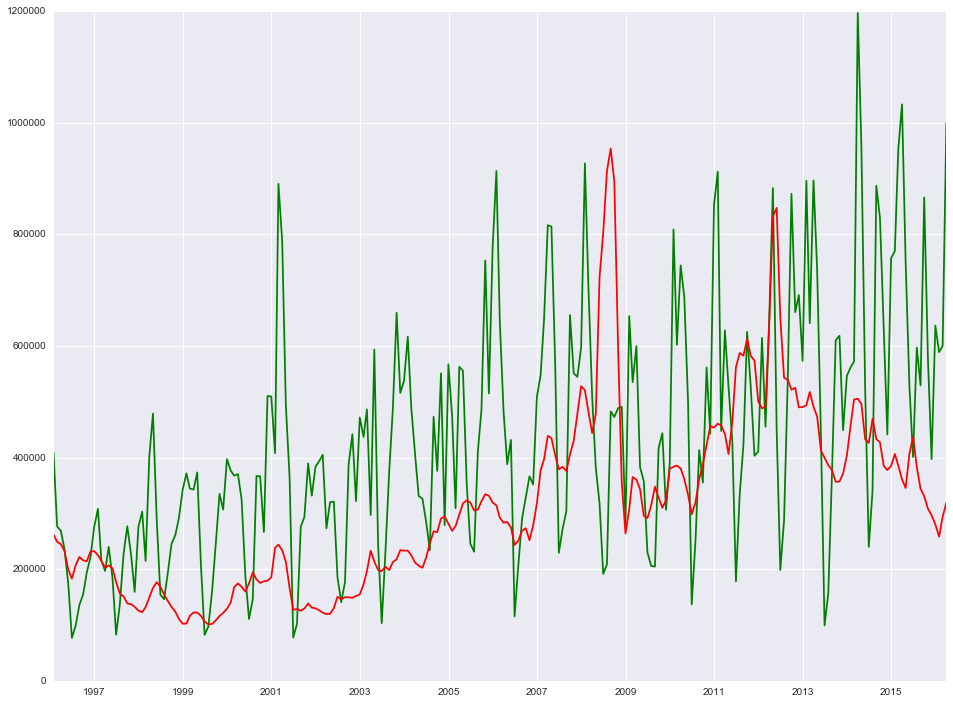

In [38]:
#looking to see if there is any leading or lagging in the variables
import matplotlib.pyplot as plt
%matplotlib inline
#dollar no apparent lag
#crude no apparent lag
#corn no apparent lag
#gas no apparent lag
#coal no apparent lag
#urea no apparent lag
x = (df['Monthly_Date'])
y1 = (df['Monthly Imports'])
y2 = (df['Urea'])*1200
plt.figure(figsize=(16,12))
plt.plot(x,y1,'g')
plt.plot(x,y2,'r')

plt.show()

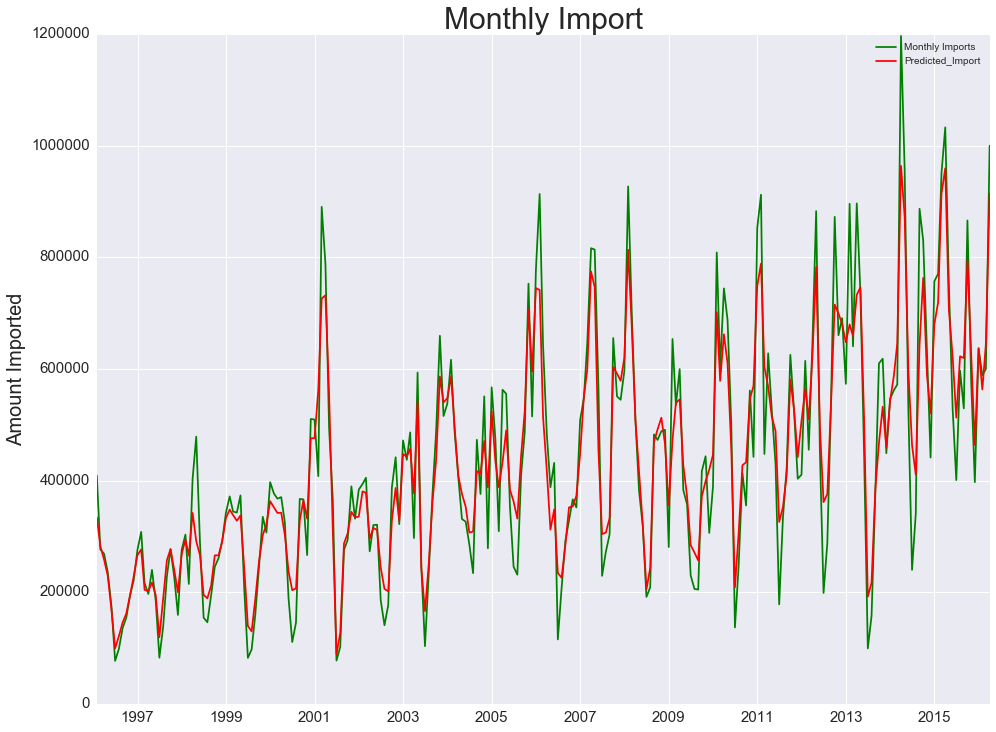

In [24]:
#looking at actual vs predicted monthly
import matplotlib.pyplot as plt
%matplotlib inline

x = (df['Monthly_Date'])
y1 = (df['Monthly Imports'])
y2 = (df['Predicted_Import'])

fig = plt.figure(figsize=(16,12))
ax = fig.add_subplot(111)
ax.plot(x,y1,'g')
ax.plot(x,y2,'r')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
ax.set_title('Monthly Import', size=(30))
ax.tick_params(axis='x',which='major',labelsize=15)
ax.tick_params(axis='y',which='major',labelsize=15)
ax.set_ylabel('Amount Imported',size=(20))
plt.show()

### Make into Daily and make graph

In [73]:
df_month['Predicted_Import'].describe()

count       1056.000000
mean      431879.128986
std       184835.487013
min        79476.051232
25%       292901.211635
50%       399194.624749
75%       562217.992990
max      1068630.188452
Name: Predicted_Import, dtype: float64

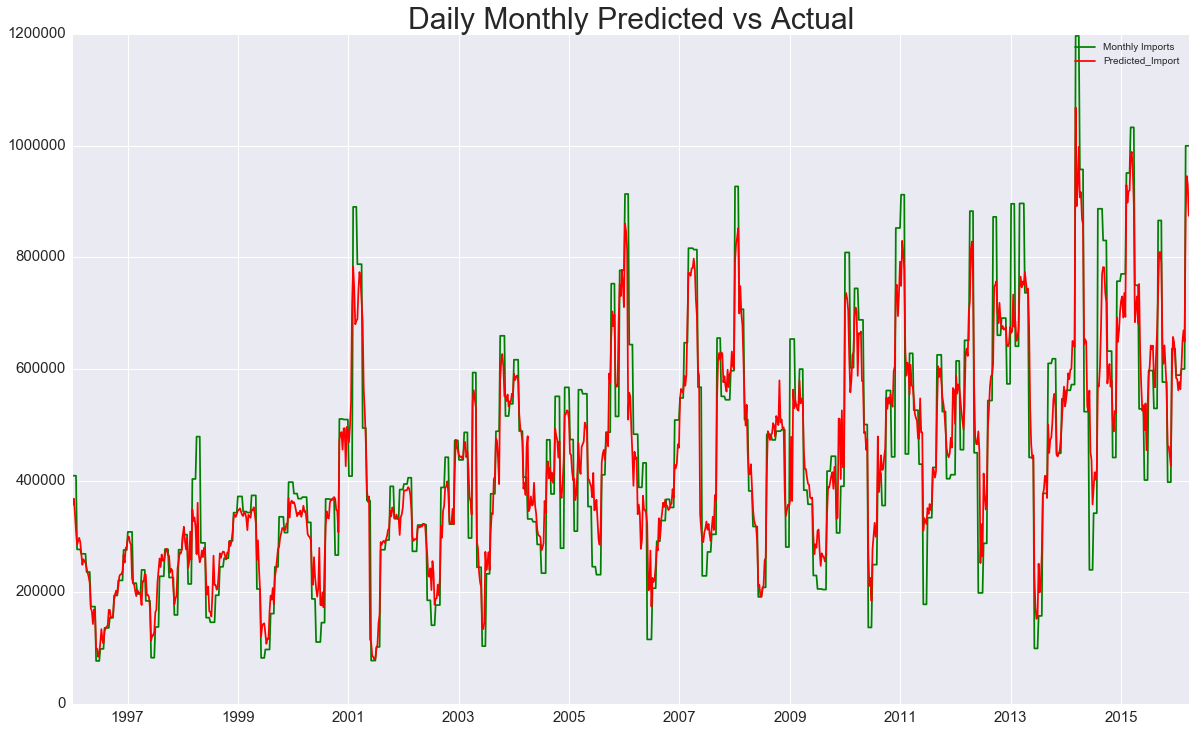

In [75]:
import matplotlib.pyplot as plt
%matplotlib inline
x_whole = (df_month['Date'])
y1_whole = (df_month['Monthly Imports'])
y2_whole = (df_month['Predicted_Import'])

fig = plt.figure(figsize=(20,12))
ax = fig.add_subplot(111)
ax.plot(x_whole,y1_whole,'g')
ax.plot(x_whole,y2_whole,'r')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
ax.set_title('Daily Monthly Predicted vs Actual', size=(30))
ax.tick_params(axis='x',which='major',labelsize=15)
ax.tick_params(axis='y',which='major',labelsize=15)
plt.show()

## Now Predicting Urea Using My Coal Prediction (not coal+freight like other)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
data = pd.read_csv("C:/Users/msteinme/Documents/ureamorevariables.csv")
df_96on = data[['Date', 'Dollar', 'Crude', 'Corn','Gas','My_Coal','Monthly Imports','Urea']]
df_96on.head()

,Date,Dollar,Crude,Corn,Gas,My_Coal,Monthly Imports,Urea
0,1/5/1996,85.06,19.65,369.75,2.424,25.358912,408740,220
1,1/12/1996,85.06,17.98,366.25,2.215,25.269689,408740,220
2,1/19/1996,86.75,18.25,365.00,1.956,29.070713,408740,218
3,1/26/1996,87.64,17.36,360.25,1.952,29.195096,408740,215
4,2/2/1996,87.01,17.38,370.50,2.075,32.105527,276750,205


In [2]:
from datetime import datetime
df_96on['Date'] = pd.to_datetime(df_96on['Date'])
date = df_96on['Date']
df_96on.dtypes

C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


Date               datetime64[ns]
Dollar                    float64
Crude                     float64
Corn                      float64
Gas                       float64
My_Coal                   float64
Monthly Imports             int64
Urea                        int64
dtype: object

In [24]:
df_96on.describe()

,Dollar,Crude,Corn,Gas,My_Coal,Monthly Imports,Urea
count,1056.000000,1056.000000,1056.000000,1056.000000,1056.000000,1056.000000,1056.000000
mean,90.653367,54.851648,361.660275,4.611925,58.312026,433007.549242,260.121212
std,11.734927,31.319022,157.085607,2.364021,33.658418,217395.350089,135.997458
min,71.657000,11.260000,182.500000,1.661000,20.900000,76875.000000,83.000000
25%,81.117750,26.402500,231.000000,2.770750,27.425593,273276.000000,150.750000
50%,87.835000,49.655000,322.750000,4.033500,51.925000,397255.000000,240.000000
75%,98.747500,82.082500,425.562500,5.879250,80.175000,561875.000000,335.000000
max,119.900000,145.860000,809.250000,14.431000,192.500000,1196863.000000,825.000000


In [25]:
df_96on.corr() #my coal predictions about same as correlation as mat's coal prediction

,Dollar,Crude,Corn,Gas,My_Coal,Monthly Imports,Urea
Dollar,1.000000,-0.774917,-0.682258,-0.329794,-0.755278,-0.273806,-0.728513
Crude,-0.774917,1.000000,0.777945,0.392775,0.894912,0.404582,0.870592
Corn,-0.682258,0.777945,1.000000,-0.000857,0.835674,0.336304,0.800001
Gas,-0.329794,0.392775,-0.000857,1.000000,0.285057,0.186481,0.325148
My_Coal,-0.755278,0.894912,0.835674,0.285057,1.000000,0.347260,0.882479
Monthly Imports,-0.273806,0.404582,0.336304,0.186481,0.347260,1.000000,0.421153
Urea,-0.728513,0.870592,0.800001,0.325148,0.882479,0.421153,1.000000


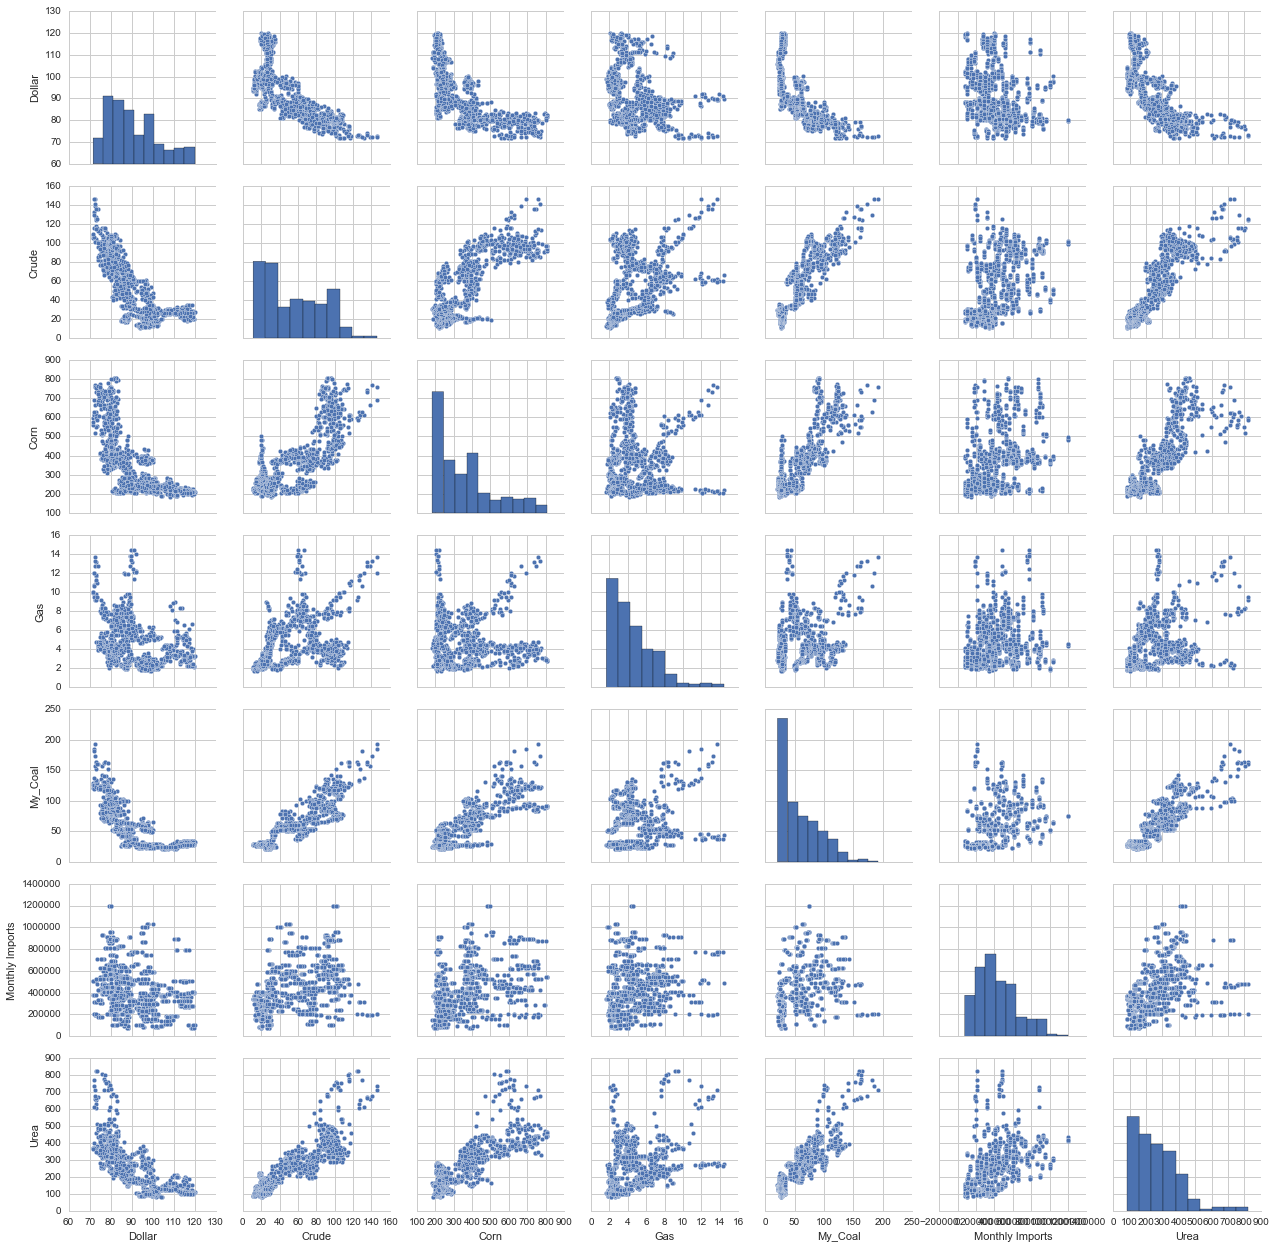

In [80]:
sns.set(style='whitegrid', context='notebook')
sns.pairplot(df_96on, size=2.5);
plt.show()

In [3]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from statsmodels.sandbox.regression.predstd import wls_prediction_std
#fit a OLS model with all, see how R^2 changes
X = df_96on[['Dollar','Crude','Corn','Gas','My_Coal','Monthly Imports']]
Y = df_96on[['Urea']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
est.summary()
#R^2 slightly less than beginning model

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Urea   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     866.5
Date:                Fri, 01 Apr 2016   Prob (F-statistic):               0.00
Time:                        12:56:09   Log-Likelihood:                -5743.4
No. Observations:                1056   AIC:                         1.150e+04
Df Residuals:                    1049   BIC:                         1.154e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
const              22.0644     27.750      0.795      0.427       -32.388    76.517
Dollar             -0.3597      0.243     -1.479      0.140        -0.837     0.118
Crude               1.0956      0.144      7.626      0.000         0.814     1.378
Corn                0.2059      0.024      8.531      0.000         0.159     0.253
Gas                 5.3240      0.959      5.552      0.000         3.442     7.206
My_Coal             1.5349      0.135     11.408      0.000         1.271     1.799
Monthly Imports  5.094e-05   8.73e-06      5.835      0.000      3.38e-05  6.81e-05
==============================================================================
Omnibus:                      435.597   Durbin-Watson:                   0.080
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3612.660
Skew:                           1.678   Prob(JB):                         0.00
Kurtosis:                      11.417   Cond. No.                     7.82e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.82e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [4]:
#fit a OLS model with no gas or import, see how R^2 changes
X = df_96on[['Dollar','Crude','Corn','My_Coal']]
Y = df_96on[['Urea']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Urea   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     1203.
Date:                Fri, 01 Apr 2016   Prob (F-statistic):               0.00
Time:                        12:56:58   Log-Likelihood:                -5778.0
No. Observations:                1056   AIC:                         1.157e+04
Df Residuals:                    1051   BIC:                         1.159e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         74.4883     27.126      2.746      0.006        21.262   127.715
Dollar        -0.4833      0.247     -1.958      0.050        -0.968     0.001
Crude          1.5652      0.135     11.553      0.000         1.299     1.831
Corn           0.1422      0.021      6.818      0.000         0.101     0.183
My_Coal        1.5803      0.138     11.478      0.000         1.310     1.850
==============================================================================
Omnibus:                      334.038   Durbin-Watson:                   0.065
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1931.475
Skew:                           1.330   Prob(JB):                         0.00
Kurtosis:                       9.068   Cond. No.                     6.30e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.3e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [83]:
#fit a OLS model with coal, gas, monthly imports, see how R^2 changes
X = df_96on[['My_Coal','Gas','Monthly Imports']]
Y = df_96on[['Urea']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
est.summary()
#looking at dollar, crude, corn, coal, coal is the most important to keep, barely changed from .794 to .798

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Urea   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     1385.
Date:                Wed, 30 Mar 2016   Prob (F-statistic):               0.00
Time:                        12:10:12   Log-Likelihood:                -5841.2
No. Observations:                1056   AIC:                         1.169e+04
Df Residuals:                    1052   BIC:                         1.171e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
const              15.2861      5.367      2.848      0.004         4.755    25.817
My_Coal             3.3135      0.061     53.885      0.000         3.193     3.434
Gas                 3.9307      0.836      4.704      0.000         2.291     5.570
Monthly Imports  7.734e-05   9.29e-06      8.327      0.000      5.91e-05  9.56e-05
==============================================================================
Omnibus:                      242.789   Durbin-Watson:                   0.073
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1267.900
Skew:                           0.956   Prob(JB):                    4.78e-276
Kurtosis:                       8.016   Cond. No.                     1.38e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.38e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


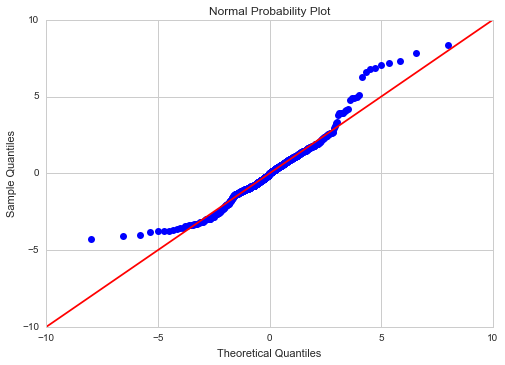

In [85]:
from scipy import stats
res = est.resid
fig = sm.graphics.qqplot(res, dist=stats.t, line='45', fit=True)
plt.title('Normal Probability Plot')
fig.show()
#still obviously skewed

In [86]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
X = df_96on[['Dollar','Crude','Corn','Gas','My_Coal','Monthly Imports']].values
y = df_96on['Urea'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)

In [87]:
from sklearn import metrics
from sklearn import grid_search
from sklearn.grid_search import GridSearchCV

def fit_predict_model(X_train,y_train,):
    """Find and tune the optimal model. Make a prediction on urea data"""
    
    # Setup a Random Forest Regressor
    regressor = RandomForestRegressor()

    parameters = {'n_estimators':(100,125,150,175,200),
                  'max_depth':(5,6,7,8,9,10)}

    mse_scorer = metrics.make_scorer(metrics.mean_squared_error, greater_is_better = False)
    
    # use grid search to fine tune the RandomForests Regressor and
    # obtain the parameters that generate the best training performance. 
    reg = grid_search.GridSearchCV(regressor, param_grid=parameters,
                                   scoring=mse_scorer, cv = 10)
    
    # Fit the learner to the training data to obtain the best parameter set
    print ("Final Model: ")
    print (reg.fit(X_train, y_train))
    return reg

In [92]:
#do multiple times to see what parameters are the best
rdf_model_ureaall = fit_predict_model(X_train,y_train)
print (rdf_model_ureaall.best_estimator_)

Final Model: 
GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': (5, 6, 7, 8, 9, 10), 'n_estimators': (100, 125, 150, 175, 200)},
       pre_dispatch='2*n_jobs', refit=True,
       scoring=make_scorer(mean_squared_error, greater_is_better=False),
       verbose=0)
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=175, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)


In [93]:
X = df_96on[['Dollar','Crude','Corn','Gas','My_Coal','Monthly Imports']].values
y = df_96on['Urea'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=175, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))
print(forest.feature_importances_) #crude and coal most important in this model, MSE less!,R^2 better,coal&crude more important

MSE train: 161.954, test: 810.677
R^2 train: 0.992, test: 0.947
[ 0.01627144  0.54740366  0.07185488  0.05553627  0.29054833  0.01838542]


In [96]:
#comparing the different models
urea_predicted = forest.predict(X)
urea_predicted = pd.DataFrame(urea_predicted)
df_96on['Predicted_UreaAll_RDF'] = urea_predicted
rdf_error = (abs(df_96on['Predicted_UreaAll_RDF'] - df_96on['Urea'])/df_96on['Urea'])*100
df_96on['RDF_Error'] = rdf_error

mlr_predicted = 22.0644 - (df_96on['Dollar']*0.3597) + (df_96on['Crude']*1.0956) + (df_96on['Corn']*0.2059) + (df_96on['Gas']*5.3240) + (df_96on['My_Coal']*1.5349) + (df_96on['Monthly Imports']*0.00005094)
df_96on['Predicted_UreaAll_MLR'] = mlr_predicted
mlr_error = (abs(df_96on['Predicted_UreaAll_MLR'] - df_96on['Urea'])/df_96on['Urea'])*100
df_96on['MLR_All_Error'] = mlr_error

mlrdollar_predicted = 852.7830 - (df_96on['Dollar']*7.4373) + (df_96on['Gas']*4.0370) + (df_96on['Monthly Imports']*0.0001)
df_96on['Predicted_UreaDollar_MLR'] = mlrdollar_predicted
mlrdollar_error = (abs(df_96on['Predicted_UreaDollar_MLR'] - df_96on['Urea'])/df_96on['Urea'])*100
df_96on['MLR_Dollar_Error'] = mlrdollar_error

mlrcrude_predicted = 42.1246 + (df_96on['Crude']*3.6728) - (df_96on['Gas']*1.2986) + (df_96on['Monthly Imports']*0.00005202)
df_96on['Predicted_UreaCrude_MLR'] = mlrcrude_predicted
mlrcrude_error = (abs(df_96on['Predicted_UreaCrude_MLR'] - df_96on['Urea'])/df_96on['Urea'])*100
df_96on['MLR_Crude_Error'] = mlrcrude_error

mlrcorn_predicted = -89.3236 + (df_96on['Corn']*0.6616) + (df_96on['Gas']*17.5938) + (df_96on['Monthly Imports']*0.000067)
df_96on['Predicted_UreaCorn_MLR'] = mlrcorn_predicted
mlrcorn_error = (abs(df_96on['Predicted_UreaCorn_MLR'] - df_96on['Urea'])/df_96on['Urea'])*100
df_96on['MLR_Corn_Error'] = mlrcorn_error

mlrcoal_predicted = 15.2861 + (df_96on['My_Coal']*3.3135) - (df_96on['Gas']*3.9307) + (df_96on['Monthly Imports']*0.00007734)
df_96on['Predicted_UreaCoal_MLR'] = mlrcoal_predicted
mlrcoal_error = (abs(df_96on['Predicted_UreaCoal_MLR'] - df_96on['Urea'])/df_96on['Urea'])*100
df_96on['MLR_Coal_Error'] = mlrcoal_error

print("Average RDF error is: %.3f" % (rdf_error.mean()))  
print("Average MLR All error is: %.3f" % (mlr_error.mean()))
print("Average MLR Dollar error is: %.3f" % (mlrdollar_error.mean()))
print("Average MLR Crude error is: %.3f" % (mlrcrude_error.mean()))
print("Average MLR Corn error is: %.3f" % (mlrcorn_error.mean()))
print("Average MLR My_Coal error is: %.3f" % (mlrcoal_error.mean()))
df_96on

Average RDF error is: 3.778
Average MLR All error is: 14.488
Average MLR Dollar error is: 27.028
Average MLR Crude error is: 17.903
Average MLR Corn error is: 16.996
Average MLR My_Coal error is: 21.299


,Date,Dollar,Crude,Corn,Gas,My_Coal,Monthly Imports,Urea,Predicted_UreaAll_RDF,RDF_Error,Predicted_UreaAll_MLR,MLR_All_Error,Predicted_UreaDollar_MLR,MLR_Dollar_Error,Predicted_UreaCrude_MLR,MLR_Crude_Error,Predicted_UreaCorn_MLR,MLR_Corn_Error,Predicted_UreaCoal_MLR,MLR_Coal_Error
0,1996-01-05,85.060,19.65,369.75,2.424,25.358912,408740,220,213.123968,3.125469,161.778368,26.464378,270.825950,23.102705,132.409968,39.813651,225.335951,2.425432,121.396788,44.819642
1,1996-01-12,85.060,17.98,366.25,2.215,25.269689,408740,220,214.777143,2.374026,157.978402,28.191636,269.982217,22.719190,126.547800,42.478273,219.343247,0.298524,121.922665,44.580607
2,1996-01-19,86.750,18.25,365.00,1.956,29.070713,408740,218,212.953600,2.314862,161.864222,25.750357,256.367597,17.599815,127.875793,41.341379,213.959453,1.853462,135.535411,37.827793
3,1996-01-26,87.640,17.36,360.25,1.952,29.195096,408740,215,205.666743,4.341050,159.760599,25.692744,249.732252,16.154536,124.612196,42.040839,210.746478,1.978383,135.963276,36.761267
4,1996-02-02,87.010,17.38,370.50,2.075,32.105527,276750,205,204.791314,0.101798,160.518099,21.698488,241.715302,17.909903,117.659804,42.604974,210.848585,2.852968,134.915406,34.187607
5,1996-02-09,86.870,17.38,367.25,2.244,28.667889,276750,205,206.066171,0.520084,155.522607,24.135313,243.438777,18.750623,117.440341,42.712029,211.671737,3.254506,122.860503,40.068047
6,1996-02-16,85.910,18.40,382.75,2.171,28.169393,276750,210,205.579886,2.104816,159.023088,24.274720,250.283884,19.182802,121.281394,42.246955,220.642190,5.067709,121.495679,42.144915
7,1996-02-23,85.430,18.45,383.50,2.263,28.828182,276750,210,207.691429,1.099320,160.905932,23.378127,254.225192,21.059615,121.345563,42.216398,222.757019,6.074771,123.316952,41.277642
8,1996-03-01,86.490,18.62,386.75,2.058,27.863549,268773,210,201.014171,4.278966,158.401694,24.570622,244.716369,16.531604,121.821189,41.989910,220.766031,5.126682,120.309492,42.709766
9,1996-03-08,86.810,18.87,388.50,2.053,26.513218,268773,205,199.757029,2.557547,156.821572,23.501672,242.316248,18.203048,122.745882,40.123960,221.835862,8.212616,115.854825,43.485451


#### Crude, corn, my_coal using since top three important in MLR and RDF

In [107]:
#fit a OLS model with crude, corn, coal to see how R^2 changes, getting rid of dollar did nothing
X = df_96on[['Crude','Corn','My_Coal']]
Y = df_96on[['Urea']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
est.summary() #R^2 didn't change too much

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Urea   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     1599.
Date:                Wed, 30 Mar 2016   Prob (F-statistic):               0.00
Time:                        12:56:46   Log-Likelihood:                -5779.9
No. Observations:                1056   AIC:                         1.157e+04
Df Residuals:                    1052   BIC:                         1.159e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         22.1189      4.530      4.882      0.000        13.229    31.008
Crude          1.6519      0.128     12.884      0.000         1.400     1.904
Corn           0.1466      0.021      7.060      0.000         0.106     0.187
My_Coal        1.6182      0.136     11.856      0.000         1.350     1.886
==============================================================================
Omnibus:                      320.293   Durbin-Watson:                   0.066
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1774.346
Skew:                           1.282   Prob(JB):                         0.00
Kurtosis:                       8.810   Cond. No.                     1.03e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.03e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [98]:
X = df_96on[['Crude','Corn','My_Coal']].values
y = df_96on['Urea'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)

In [99]:
def fit_predict_model(X_train,y_train,):
    """Find and tune the optimal model. Make a prediction on urea data"""
    
    # Setup a Random Forest Regressor
    regressor = RandomForestRegressor()

    parameters = {'n_estimators':(100,125,150,175,200),
                  'max_depth':(5,6,7,8,9,10)}

    mse_scorer = metrics.make_scorer(metrics.mean_squared_error, greater_is_better = False)
    
    # use grid search to fine tune the RandomForests Regressor and
    # obtain the parameters that generate the best training performance. 
    reg = grid_search.GridSearchCV(regressor, param_grid=parameters,
                                   scoring=mse_scorer, cv = 10)
    
    # Fit the learner to the training data to obtain the best parameter set
    print ("Final Model: ")
    print (reg.fit(X_train, y_train))
    return reg

In [103]:
rdf_model_ureatop3 = fit_predict_model(X_train,y_train)
print (rdf_model_ureatop3.best_estimator_)

Final Model: 
GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': (5, 6, 7, 8, 9, 10), 'n_estimators': (100, 125, 150, 175, 200)},
       pre_dispatch='2*n_jobs', refit=True,
       scoring=make_scorer(mean_squared_error, greater_is_better=False),
       verbose=0)
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=200, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)


In [109]:
X = df_96on[['Crude','Corn','My_Coal']].values
y = df_96on['Urea'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=200, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))
print(forest.feature_importances_)

MSE train: 259.098, test: 1289.205
R^2 train: 0.987, test: 0.916
[ 0.58820624  0.09689245  0.3149013 ]


In [110]:
#comparing the different models
urea_predicted3 = forest.predict(X)
urea_predicted3 = pd.DataFrame(urea_predicted3)
df_96on['Predicted_UreaTop3_RDF'] = urea_predicted3
rdf_error3 = (abs(df_96on['Predicted_UreaTop3_RDF'] - df_96on['Urea'])/df_96on['Urea'])*100
df_96on['RDF_Top3_Error'] = rdf_error3

mlrtop3_predicted = 22.1189 + (df_96on['Crude']*1.6519) + (df_96on['Corn']*0.1466) + (df_96on['My_Coal']*1.6182) 
df_96on['Predicted_UreaTop3_MLR'] = mlrtop3_predicted
mlrtop3_error = (abs(df_96on['Predicted_UreaTop3_MLR'] - df_96on['Urea'])/df_96on['Urea'])*100
df_96on['MLR_Top3_Error'] = mlrtop3_error

print("Average RDF Top 3 error is: %.3f" % (rdf_error3.mean()))  
print("Average MLR Top3 error is: %.3f" % (mlrtop3_error.mean()))

df_96on #error a bit higher then when other coal was used

Average RDF Top 3 error is: 5.311
Average MLR Top3 error is: 16.762


,Date,Dollar,Crude,Corn,Gas,My_Coal,Monthly Imports,Urea,Predicted_UreaAll_RDF,RDF_Error,...,Predicted_UreaCrude_MLR,MLR_Crude_Error,Predicted_UreaCorn_MLR,MLR_Corn_Error,Predicted_UreaCoal_MLR,MLR_Coal_Error,Predicted_UreaTop3_RDF,RDF_Top3_Error,Predicted_UreaTop3_MLR,MLR_Top3_Error
0,1996-01-05,85.060,19.65,369.75,2.424,25.358912,408740,220,213.123968,3.125469,...,132.409968,39.813651,225.335951,2.425432,121.396788,44.819642,203.654854,7.429612,149.819876,31.900057
1,1996-01-12,85.060,17.98,366.25,2.215,25.269689,408740,220,214.777143,2.374026,...,126.547800,42.478273,219.343247,0.298524,121.922665,44.580607,210.359167,4.382197,146.403722,33.452854
2,1996-01-19,86.750,18.25,365.00,1.956,29.070713,408740,218,212.953600,2.314862,...,127.875793,41.341379,213.959453,1.853462,135.535411,37.827793,206.119000,5.450000,152.817303,29.900320
3,1996-01-26,87.640,17.36,360.25,1.952,29.195096,408740,215,205.666743,4.341050,...,124.612196,42.040839,210.746478,1.978383,135.963276,36.761267,205.179000,4.567907,150.852038,29.836261
4,1996-02-02,87.010,17.38,370.50,2.075,32.105527,276750,205,204.791314,0.101798,...,117.659804,42.604974,210.848585,2.852968,134.915406,34.187607,201.254750,1.826951,157.097386,23.367129
5,1996-02-09,86.870,17.38,367.25,2.244,28.667889,276750,205,206.066171,0.520084,...,117.440341,42.712029,211.671737,3.254506,122.860503,40.068047,203.124417,0.914919,151.058149,26.313098
6,1996-02-16,85.910,18.40,382.75,2.171,28.169393,276750,210,205.579886,2.104816,...,121.281394,42.246955,220.642190,5.067709,121.495679,42.144915,202.355417,3.640278,154.208722,26.567275
7,1996-02-23,85.430,18.45,383.50,2.263,28.828182,276750,210,207.691429,1.099320,...,121.345563,42.216398,222.757019,6.074771,123.316952,41.277642,204.506250,2.616071,155.467319,25.967943
8,1996-03-01,86.490,18.62,386.75,2.058,27.863549,268773,210,201.014171,4.278966,...,121.821189,41.989910,220.766031,5.126682,120.309492,42.709766,198.393750,5.526786,154.663623,26.350656
9,1996-03-08,86.810,18.87,388.50,2.053,26.513218,268773,205,199.757029,2.557547,...,122.745882,40.123960,221.835862,8.212616,115.854825,43.485451,186.454534,9.046569,153.148042,25.293638


## For Monthly Imports Look at top 3 features: coal, urea, dollar

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
data = pd.read_csv("C:/Users/msteinme/Documents/ureamorevariables.csv")
df_month = data[['Date', 'Dollar', 'Crude', 'Corn','Gas','Coal','Urea','Monthly Imports']]
df_month.tail()

,Date,Dollar,Crude,Corn,Gas,Coal,Urea,Monthly Imports
1051,2/26/2016,98.148,34.58,359.50,1.873,57.45,265,600000
1052,3/4/2016,97.340,37.75,358.25,1.787,58.00,270,1000000
1053,3/11/2016,96.172,40.09,365.00,1.915,58.50,274,1000000
1054,3/18/2016,95.086,41.14,371.75,1.989,59.20,265,1000000
1055,3/25/2016,96.273,40.63,374.50,1.882,58.75,255,1000000


In [27]:
from datetime import datetime
df_month['Date'] = pd.to_datetime(df_month['Date'])
date = df_month['Date']
df_month.dtypes

C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


Date               datetime64[ns]
Dollar                    float64
Crude                     float64
Corn                      float64
Gas                       float64
Coal                      float64
Urea                        int64
Monthly Imports             int64
dtype: object

In [28]:
X = df_month[['Dollar','Coal','Urea']].values
y = df_month['Monthly Imports'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)

In [29]:
from sklearn import metrics
from sklearn import grid_search
from sklearn.grid_search import GridSearchCV

def fit_predict_model(X_train,y_train,):
    """Find and tune the optimal model. Make a prediction on urea data"""
    
    # Setup a Random Forest Regressor
    regressor = RandomForestRegressor()

    parameters = {'n_estimators':(100,125,150,175,200),
                  'max_depth':(5,6,7,8,9,10)}

    mse_scorer = metrics.make_scorer(metrics.mean_squared_error, greater_is_better = False)
    
    # use grid search to fine tune the RandomForests Regressor and
    # obtain the parameters that generate the best training performance. 
    reg = grid_search.GridSearchCV(regressor, param_grid=parameters,
                                   scoring=mse_scorer, cv = 10)
    
    # Fit the learner to the training data to obtain the best parameter set
    print ("Final Model: ")
    print (reg.fit(X_train, y_train))
    return reg

In [32]:
rdf_model_importall = fit_predict_model(X_train,y_train)
print (rdf_model_importall.best_estimator_)

Final Model: 
GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': (5, 6, 7, 8, 9, 10), 'n_estimators': (100, 125, 150, 175, 200)},
       pre_dispatch='2*n_jobs', refit=True,
       scoring=make_scorer(mean_squared_error, greater_is_better=False),
       verbose=0)
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=175, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)


In [33]:
X = df_month[['Dollar','Coal','Urea']].values
y = df_month['Monthly Imports'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=175, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))
print(forest.feature_importances_) #even worse MSE, bad model, need to find variables more correlated in the first place
                                   #to monthly imports

MSE train: 4018997250.080, test: 14765205015.232
R^2 train: 0.917, test: 0.664
[ 0.23334972  0.40126729  0.365383  ]


In [35]:
predicted_import = forest.predict(X)
predicted_import = pd.DataFrame(predicted_import)
predicted_import.columns = ['Predicted_Import_Top3']
predicted_import.tail()

,Predicted_Import_Top3
1051,663384.872306
1052,865284.298556
1053,908234.503856
1054,898281.985851
1055,835131.857721


In [36]:
df_month['Predicted_Import_Top3'] = predicted_import
df_month.head()

,Date,Dollar,Crude,Corn,Gas,Coal,Urea,Monthly Imports,Predicted_Import_Top3
0,1996-01-05,85.06,19.65,369.75,2.424,27.15,220,408740,389800.649805
1,1996-01-12,85.06,17.98,366.25,2.215,27.55,220,408740,378808.604091
2,1996-01-19,86.75,18.25,365.00,1.956,27.55,218,408740,329192.638377
3,1996-01-26,87.64,17.36,360.25,1.952,27.55,215,408740,295769.957739
4,1996-02-02,87.01,17.38,370.50,2.075,27.60,205,276750,271958.475034


In [37]:
#monthly predictions
jan_96 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][0:4]
feb_96 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][4:8]
mar_96 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][8:13]
apr_96 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][13:17]
may_96 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][17:22]
jun_96 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][22:26]
jul_96 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][26:30]
aug_96 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][30:35]
sep_96 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][35:39]
oct_96 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][39:43]
nov_96 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][43:48]
dec_96 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][48:52]
jan_97 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][52:57]
feb_97 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][57:61]
mar_97 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][61:65]
apr_97 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][65:69]
may_97 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][69:74]
jun_97 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][74:78]
jul_97 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][78:82]
aug_97 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][82:87]
sep_97 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][87:91]
oct_97 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][91:96]
nov_97 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][96:100]
dec_97 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][100:104]
jan_98 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][104:109]
feb_98 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][109:113]
mar_98 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][113:117]
apr_98 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][117:121]
may_98 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][121:126]
jun_98 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][126:130]
jul_98 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][130:135]
aug_98 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][135:139]
sep_98 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][139:143]
oct_98 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][143:148]
nov_98 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][148:152]
dec_98 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][152:156]
jan_99 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][156:161]
feb_99 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][161:165]
mar_99 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][165:169]
apr_99 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][169:174]
may_99 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][174:178]
jun_99 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][178:182]
jul_99 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][182:187]
aug_99 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][187:191]
sep_99 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][191:195]
oct_99 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][195:200]
nov_99 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][200:204]
dec_99 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][204:209]
jan_00 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][209:213]
feb_00 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][213:217]
mar_00 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][217:222]
apr_00 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][222:226]
may_00 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][226:230]
jun_00 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][230:235]
jul_00 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][235:239]
aug_00 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][239:243]
sep_00 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][243:248]
oct_00 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][248:252]
nov_00 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][252:256]
dec_00 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][256:261]
jan_01 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][261:265]
feb_01 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][265:269]
mar_01 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][269:274]
apr_01 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][274:278]
may_01 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][278:282]
jun_01 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][282:287]
jul_01 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][287:291]
aug_01 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][291:296]
sep_01 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][296:300]
oct_01 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][300:304]
nov_01 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][304:309]
dec_01 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][309:313]
jan_02 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][313:317]
feb_02 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][317:321]
mar_02 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][321:326]
apr_02 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][326:330]
may_02 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][330:335]
jun_02 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][335:339]
jul_02 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][339:343]
aug_02 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][343:348]
sep_02 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][348:352]
oct_02 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][352:356]
nov_02 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][356:361]
dec_02 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][361:365]
jan_03 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][365:370]
feb_03 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][370:374]
mar_03 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][374:378]
apr_03 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][378:382]
may_03 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][382:387]
jun_03 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][387:391]
jul_03 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][391:395]
aug_03 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][395:400]
sep_03 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][400:404]
oct_03 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][404:409]
nov_03 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][409:413]
dec_03 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][413:417]
jan_04 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][417:422]
feb_04 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][422:426]
mar_04 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][426:430]
apr_04 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][430:435]
may_04 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][435:439]
jun_04 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][439:443]
jul_04 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][443:448]
aug_04 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][448:452]
sep_04 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][452:456]
oct_04 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][456:461]
nov_04 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][461:465]
dec_04 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][465:470]
jan_05 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][470:474]
feb_05 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][474:478]
mar_05 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][478:482]
apr_05 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][482:487]
may_05 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][487:491]
jun_05 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][491:495]
jul_05 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][495:500]
aug_05 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][500:504]
sep_05 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][504:509]
oct_05 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][509:513]
nov_05 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][513:517]
dec_05 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][517:522]
jan_06 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][522:526]
feb_06 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][526:530]
mar_06 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][530:535]
apr_06 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][535:539]
may_06 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][539:543]
jun_06 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][543:548]
jul_06 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][548:552]
aug_06 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][552:556]
sep_06 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][556:561]
oct_06 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][561:565]
nov_06 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][565:569]
dec_06 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][569:574]
jan_07 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][574:578]
feb_07 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][578:582]
mar_07 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][582:587]
apr_07 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][587:591]
may_07 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][591:595]
jun_07 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][595:600]
jul_07 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][600:604]
aug_07 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][604:609]
sep_07 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][609:613]
oct_07 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][613:617]
nov_07 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][617:622]
dec_07 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][622:626]
jan_08 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][626:630]
feb_08 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][630:635]
mar_08 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][635:639]
apr_08 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][639:643]
may_08 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][643:648]
jun_08 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][648:652]
jul_08 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][652:656]
aug_08 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][656:661]
sep_08 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][661:665]
oct_08 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][665:670]
nov_08 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][670:674]
dec_08 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][674:678]
jan_09 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][678:683]
feb_09 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][683:687]
mar_09 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][687:691]
apr_09 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][691:695]
may_09 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][695:700]
jun_09 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][700:704]
jul_09 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][704:709]
aug_09 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][709:713]
sep_09 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][713:717]
oct_09 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][717:722]
nov_09 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][722:726]
dec_09 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][726:730]
jan_10 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][730:735]
feb_10 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][735:739]
mar_10 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][739:743]
apr_10 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][743:748]
may_10 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][748:752]
jun_10 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][752:756]
jul_10 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][756:761]
aug_10 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][761:765]
sep_10 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][765:769]
oct_10 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][769:774]
nov_10 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][774:778]
dec_10 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][778:783]
jan_11 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][783:787]
feb_11 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][787:791]
mar_11 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][791:795]
apr_11 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][795:800]
may_11 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][800:804]
jun_11 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][804:808]
jul_11 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][808:813]
aug_11 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][813:817]
sep_11 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][817:822]
oct_11 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][822:826]
nov_11 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][826:830]
dec_11 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][830:835]
jan_12 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][835:839]
feb_12 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][839:843]
mar_12 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][843:848]
apr_12 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][848:852]
may_12 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][852:856]
jun_12 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][856:861]
jul_12 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][861:865]
aug_12 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][865:870]
sep_12 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][870:874]
oct_12 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][874:878]
nov_12 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][878:883]
dec_12 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][883:887]
jan_13 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][887:891]
feb_13 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][891:895]
mar_13 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][895:900]
apr_13 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][900:904]
may_13 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][904:909]
jun_13 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][909:913]
jul_13 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][913:917]
aug_13 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][917:922]
sep_13 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][922:926]
oct_13 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][926:930]
nov_13 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][930:935]
dec_13 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][935:939]
jan_14 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][939:944]
feb_14 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][944:948]
mar_14 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][948:952]
apr_14 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][952:956]
may_14 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][956:961]
jun_14 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][961:965]
jul_14 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][965:969]
aug_14 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][969:974]
sep_14 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][974:978]
oct_14 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][978:983]
nov_14 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][983:987]
dec_14 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][987:991]
jan_15 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][991:996]
feb_15 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][996:1000]
mar_15 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][1000:1004]
apr_15 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][1004:1008]
may_15 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][1008:1013]
jun_15 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][1013:1017]
jul_15 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][1017:1022]
aug_15 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][1022:1026]
sep_15 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][1026:1030]
oct_15 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][1030:1035]
nov_15 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][1035:1039]
dec_15 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][1039:1043]
jan_16 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][1043:1048]
feb_16 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][1048:1052]
mar_16 = df_month[['Date','Dollar','Crude','Corn','Gas','Coal','Urea' ,'Monthly Imports','Predicted_Import_Top3']][1052:1056]
mar_16

,Date,Dollar,Crude,Corn,Gas,Coal,Urea,Monthly Imports,Predicted_Import_Top3
1052,2016-03-04,97.340,37.75,358.25,1.787,58.00,270,1000000,865284.298556
1053,2016-03-11,96.172,40.09,365.00,1.915,58.50,274,1000000,908234.503856
1054,2016-03-18,95.086,41.14,371.75,1.989,59.20,265,1000000,898281.985851
1055,2016-03-25,96.273,40.63,374.50,1.882,58.75,255,1000000,835131.857721


In [38]:
mycolumns = ['Dollar','Crude','Corn','Gas','Coal','Urea','Monthly Imports','Predicted_Import_Top3']
df = pd.DataFrame(columns=mycolumns)
rows = [jan_96.mean(),feb_96.mean(),mar_96.mean(),apr_96.mean(),may_96.mean(),jun_96.mean(),
        jul_96.mean(),aug_96.mean(),sep_96.mean(),oct_96.mean(),nov_96.mean(),dec_96.mean(),
        jan_97.mean(),feb_97.mean(),mar_97.mean(),apr_97.mean(),may_97.mean(),jun_97.mean(),
        jul_97.mean(),aug_97.mean(),sep_97.mean(),oct_97.mean(),nov_97.mean(),dec_97.mean(),
        jan_98.mean(),feb_98.mean(),mar_98.mean(),apr_98.mean(),may_98.mean(),jun_98.mean(),
        jul_98.mean(),aug_98.mean(),sep_98.mean(),oct_98.mean(),nov_98.mean(),dec_98.mean(),
        jan_99.mean(),feb_99.mean(),mar_99.mean(),apr_99.mean(),may_99.mean(),jun_99.mean(),
        jul_99.mean(),aug_99.mean(),sep_99.mean(),oct_99.mean(),nov_99.mean(),dec_99.mean(),
        jan_00.mean(),feb_00.mean(),mar_00.mean(),apr_00.mean(),may_00.mean(),jun_00.mean(),
        jul_00.mean(),aug_00.mean(),sep_00.mean(),oct_00.mean(),nov_00.mean(),dec_00.mean(),
        jan_01.mean(),feb_01.mean(),mar_01.mean(),apr_01.mean(),may_01.mean(),jun_01.mean(),
        jul_01.mean(),aug_01.mean(),sep_01.mean(),oct_01.mean(),nov_01.mean(),dec_01.mean(),
        jan_02.mean(),feb_02.mean(),mar_02.mean(),apr_02.mean(),may_02.mean(),jun_02.mean(),
        jul_02.mean(),aug_02.mean(),sep_02.mean(),oct_02.mean(),nov_02.mean(),dec_02.mean(),
        jan_03.mean(),feb_03.mean(),mar_03.mean(),apr_03.mean(),may_03.mean(),jun_03.mean(),
        jul_03.mean(),aug_03.mean(),sep_03.mean(),oct_03.mean(),nov_03.mean(),dec_03.mean(),
        jan_04.mean(),feb_04.mean(),mar_04.mean(),apr_04.mean(),may_04.mean(),jun_04.mean(),
        jul_04.mean(),aug_04.mean(),sep_04.mean(),oct_04.mean(),nov_04.mean(),dec_04.mean(),
        jan_05.mean(),feb_05.mean(),mar_05.mean(),apr_05.mean(),may_05.mean(),jun_05.mean(),
        jul_05.mean(),aug_05.mean(),sep_05.mean(),oct_05.mean(),nov_05.mean(),dec_05.mean(),
        jan_06.mean(),feb_06.mean(),mar_06.mean(),apr_06.mean(),may_06.mean(),jun_06.mean(),
        jul_06.mean(),aug_06.mean(),sep_06.mean(),oct_06.mean(),nov_06.mean(),dec_06.mean(),
        jan_07.mean(),feb_07.mean(),mar_07.mean(),apr_07.mean(),may_07.mean(),jun_07.mean(),
        jul_07.mean(),aug_07.mean(),sep_07.mean(),oct_07.mean(),nov_07.mean(),dec_07.mean(),
        jan_08.mean(),feb_08.mean(),mar_08.mean(),apr_08.mean(),may_08.mean(),jun_08.mean(),
        jul_08.mean(),aug_08.mean(),sep_08.mean(),oct_08.mean(),nov_08.mean(),dec_08.mean(),
        jan_09.mean(),feb_09.mean(),mar_09.mean(),apr_09.mean(),may_09.mean(),jun_09.mean(),
        jul_09.mean(),aug_09.mean(),sep_09.mean(),oct_09.mean(),nov_09.mean(),dec_09.mean(),
        jan_10.mean(),feb_10.mean(),mar_10.mean(),apr_10.mean(),may_10.mean(),jun_10.mean(),
        jul_10.mean(),aug_10.mean(),sep_10.mean(),oct_10.mean(),nov_10.mean(),dec_10.mean(),
        jan_11.mean(),feb_11.mean(),mar_11.mean(),apr_11.mean(),may_11.mean(),jun_11.mean(),
        jul_11.mean(),aug_11.mean(),sep_11.mean(),oct_11.mean(),nov_11.mean(),dec_11.mean(),
        jan_12.mean(),feb_12.mean(),mar_12.mean(),apr_12.mean(),may_12.mean(),jun_12.mean(),
        jul_12.mean(),aug_12.mean(),sep_12.mean(),oct_12.mean(),nov_12.mean(),dec_12.mean(),
        jan_13.mean(),feb_13.mean(),mar_13.mean(),apr_13.mean(),may_13.mean(),jun_13.mean(),
        jul_13.mean(),aug_13.mean(),sep_13.mean(),oct_13.mean(),nov_13.mean(),dec_13.mean(),
        jan_14.mean(),feb_14.mean(),mar_14.mean(),apr_14.mean(),may_14.mean(),jun_14.mean(),
        jul_14.mean(),aug_14.mean(),sep_14.mean(),oct_14.mean(),nov_14.mean(),dec_14.mean(),
        jan_15.mean(),feb_15.mean(),mar_15.mean(),apr_15.mean(),may_15.mean(),jun_15.mean(),
        jul_15.mean(),aug_15.mean(),sep_15.mean(),oct_15.mean(),nov_15.mean(),dec_15.mean(),
        jan_16.mean(),feb_16.mean(),mar_16.mean()]
#puts each of those values for each of the rows
for row in rows:
    df.loc[len(df)] = row
df.head()

,Dollar,Crude,Corn,Gas,Coal,Urea,Monthly Imports,Predicted_Import_Top3
0,86.1275,18.3100,365.3125,2.13675,27.4500,218.25,408740,348392.962503
1,86.3050,17.9025,376.0000,2.18825,27.4000,207.50,276750,283097.427499
2,86.5140,19.6040,385.7500,2.20020,29.1200,204.00,268773,264862.344098
3,87.3800,21.1725,443.6250,2.31500,29.7125,193.75,236157,239769.005898
4,88.1240,19.8240,450.5500,2.31300,29.1800,166.20,174170,164475.270669


In [39]:
from datetime import datetime
rng2 = pd.date_range(start='1996-01-01', periods=243, freq='M')
rng2 = pd.DataFrame(rng2)
df['Monthly_Date']= rng2

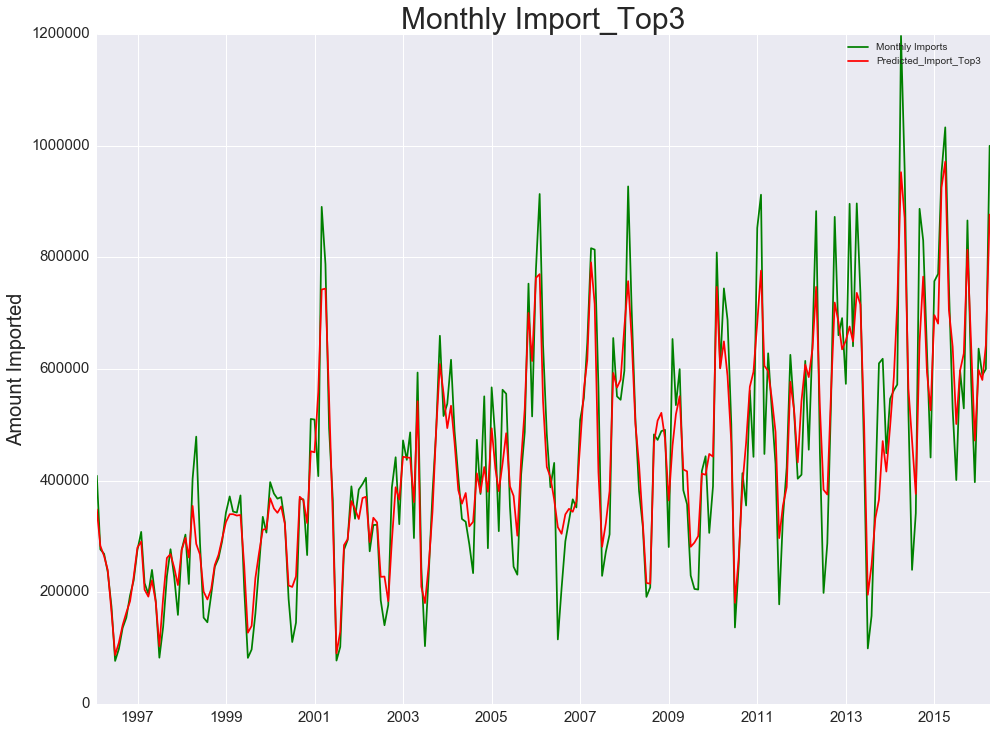

In [41]:
#looking at actual vs predicted monthly
import matplotlib.pyplot as plt
%matplotlib inline

x = (df['Monthly_Date'])
y1 = (df['Monthly Imports'])
y2 = (df['Predicted_Import_Top3'])

fig = plt.figure(figsize=(16,12))
ax = fig.add_subplot(111)
ax.plot(x,y1,'g')
ax.plot(x,y2,'r')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
ax.set_title('Monthly Import_Top3', size=(30))
ax.tick_params(axis='x',which='major',labelsize=15)
ax.tick_params(axis='y',which='major',labelsize=15)
ax.set_ylabel('Amount Imported',size=(20))
plt.show()

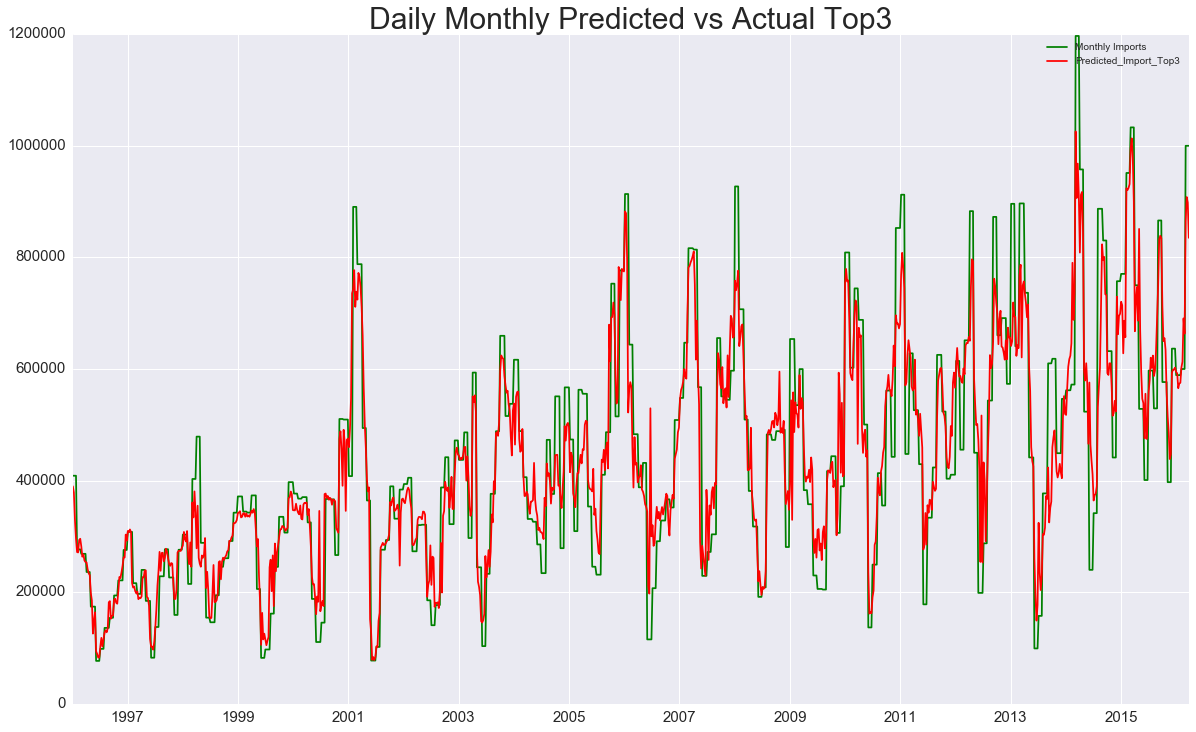

In [43]:
import matplotlib.pyplot as plt
%matplotlib inline
x_whole = (df_month['Date'])
y1_whole = (df_month['Monthly Imports'])
y2_whole = (df_month['Predicted_Import_Top3'])

fig = plt.figure(figsize=(20,12))
ax = fig.add_subplot(111)
ax.plot(x_whole,y1_whole,'g')
ax.plot(x_whole,y2_whole,'r')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
ax.set_title('Daily Monthly Predicted vs Actual Top3', size=(30))
ax.tick_params(axis='x',which='major',labelsize=15)
ax.tick_params(axis='y',which='major',labelsize=15)
plt.show()